In [1]:
import math
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-v0_8')
import warnings 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings('ignore')


# 1.  Get Data

In [2]:
#índice de RFD (Renda Familiar Disponible) del año 2017 por barrio en Barcelona.
df_rfd = pd.read_csv("Dataset_nom_se.csv", sep=";")
df_rfd

Nom_Barri RFD.2017
0                                       el Raval     71,2
1                                 el Barri Gòtic    106,1
2                                 la Barceloneta     79,6
3          Sant Pere, Santa Caterina i la Ribera     99,4
4                                  el Fort Pienc    106,5
..                                           ...      ...
68  Diagonal Mar i el Front Marítim del Poblenou    150,1
69                         el Besòs i el Maresme     60,4
70                       Provençals del Poblenou    102,3
71                      Sant Martí de Provençals     67,4
72                           la Verneda i la Pau       57

[73 rows x 2 columns]

In [3]:
df_rfd["RFD.2017"] = df_rfd["RFD.2017"].str.replace(',', '.').astype(float)
df_rfd

Nom_Barri  RFD.2017
0                                       el Raval      71.2
1                                 el Barri Gòtic     106.1
2                                 la Barceloneta      79.6
3          Sant Pere, Santa Caterina i la Ribera      99.4
4                                  el Fort Pienc     106.5
..                                           ...       ...
68  Diagonal Mar i el Front Marítim del Poblenou     150.1
69                         el Besòs i el Maresme      60.4
70                       Provençals del Poblenou     102.3
71                      Sant Martí de Provençals      67.4
72                           la Verneda i la Pau      57.0

[73 rows x 2 columns]

In [4]:
df_rfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom_Barri  73 non-null     object 
 1   RFD.2017   73 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [5]:
df_rfd = df_rfd.rename(columns={'Nom_Barri': 'barrios_bcn',
                            'RFD.2017':'indice_ingresos_2017'})
df_rfd

barrios_bcn  indice_ingresos_2017
0                                       el Raval                  71.2
1                                 el Barri Gòtic                 106.1
2                                 la Barceloneta                  79.6
3          Sant Pere, Santa Caterina i la Ribera                  99.4
4                                  el Fort Pienc                 106.5
..                                           ...                   ...
68  Diagonal Mar i el Front Marítim del Poblenou                 150.1
69                         el Besòs i el Maresme                  60.4
70                       Provençals del Poblenou                 102.3
71                      Sant Martí de Provençals                  67.4
72                           la Verneda i la Pau                  57.0

[73 rows x 2 columns]

In [6]:
#Agregando código de barrio:
df_rfd['codigo'] = list(range(1, 74))

In [7]:
df_rfd = df_rfd[['codigo'] + [col for col in df_rfd.columns if col != 'codigo']]
df_rfd

codigo                                   barrios_bcn  indice_ingresos_2017
0        1                                      el Raval                  71.2
1        2                                el Barri Gòtic                 106.1
2        3                                la Barceloneta                  79.6
3        4         Sant Pere, Santa Caterina i la Ribera                  99.4
4        5                                 el Fort Pienc                 106.5
..     ...                                           ...                   ...
68      69  Diagonal Mar i el Front Marítim del Poblenou                 150.1
69      70                         el Besòs i el Maresme                  60.4
70      71                       Provençals del Poblenou                 102.3
71      72                      Sant Martí de Provençals                  67.4
72      73                           la Verneda i la Pau                  57.0

[73 rows x 3 columns]

In [8]:
df_poblacion = pd.read_excel('Dataset_core.xlsx')
df_poblacion

Codi  n.tot  n.esp     pc.esp  n.ext     pc.ext  n.ue27    pc.ue27  \
0      1  48297  23230  48.098226  19380  40.126716   28409  58.821459   
1      2  19180   8387  43.727842   6745  35.166840   11999  62.559958   
2      3  15173   9246  60.937191   3049  20.094905   11857  78.145390   
3      4  23170  12743  54.997842   5173  22.326284   17410  75.140268   
4      5  32649  24489  75.006891   4976  15.240896   27410  83.953567   
..   ...    ...    ...        ...    ...        ...     ...        ...   
68    69  13625  10919  80.139450   1534  11.258716   12015  88.183486   
69    70  24660  16843  68.300892   6853  27.789943   17757  72.007299   
70    71  21303  17835  83.720603   2289  10.744965   18938  88.898277   
71    72  26168  22567  86.238918   2755  10.528126   23319  89.112657   
72    73  28883  24903  86.220268   3299  11.421944   25518  88.349548   

    n.ue27-esp  pc.ue27-esp  n.ue15    pc.ue15  tot_ue15  pc_t_ue15  n20.34  \
0         5179    22.294447   28207  58.403213     20090  41.596787   14119   
1         3612    43.066651   11969  62.403545      7211  37.596455    7018   
2         2611    28.239239   11801  77.776313      3372  22.223687    4622   
3         4667    36.624029   17543  75.714286      5627  24.285714    6991   
4         2921    11.927804   27266  83.512512      5383  16.487488    6975   
..         ...          ...     ...        ...       ...        ...     ...   
68        1096    10.037549   11964  87.809174      1661  12.190826    1797   
69         914     5.426587   17293  70.125710      7367  29.874290    5047   
70        1103     6.184469   18759  88.058020      2544  11.941980    3759   
71         752     3.332299   23151  88.470651      3017  11.529349    4201   
72         615     2.469582   25309  87.625939      3574  12.374061    4602   

     pc.20.34  n.esp.V1419  n.ext.V1419  n.ue27.V1419  n.ue27-esp.V1419  \
0   29.233700    -6.315535     1.285669     -2.004139         23.485932   
1   36.590198    -8.448859    92.329626     -0.990181         22.109533   
2   30.462005   -11.479177    17.449923     -4.602140         31.602823   
3   30.172637    -7.269684    10.463378     -1.242271         20.066890   
4   21.363595    -4.088826    33.512208     -1.668161         24.722459   
..        ...          ...          ...           ...               ...   
68  13.188991    -1.630631    31.335616     -0.890869          7.135875   
69  20.466342    -3.201149    33.899961     -1.497753         45.773525   
70  17.645402     1.335227    27.166667      3.305695         50.683060   
71  16.053959    -3.179166    31.190476     -2.246908         37.477148   
72  15.933248    -3.908782    35.761317     -3.381167         24.242424   

    hotel2019  alq.mq.15  alq.num.15   alq.pm.15  alq.pmq.15     alq.mq  \
0        1085  63.003195         313  601.307029   10.598882  63.548387   
1        1112  82.100000         150  756.677867   10.454949  81.275132   
2         268  39.664516         155  581.338452   15.672945  53.593220   
3         541  69.415094         212  697.156415   11.506098  70.969388   
4         543  78.937500         176  753.759716   10.165905  75.515385   
..        ...        ...         ...         ...         ...        ...   
68         13  78.083333          36  914.750556   11.631658  84.433333   
69          0  62.123077          65  512.892308    8.377386  63.458716   
70          0  71.480519          77  612.108052    9.070008  70.825581   
71          0  72.511111          90  662.253444    9.317487  71.145455   
72          0  72.871429          70  609.223143    8.610316  70.166667   

    alq.num       alq.pm    alq.pmq  alq.mq.V1519  alq.num.V1519  \
0       438   869.069703  14.709262      0.865341      39.936102   
1       221  1082.350045  14.323450     -1.004711      47.333333   
2        83   871.624699  17.738028     35.116284     -46.451613   
3       339  1020.225546  15.744337      2.239129      59.905660   
4       285  1031.295965

In [9]:
#Renombrando columnas del DataFrame:
nombres_nuevos = {
 'Codi': 'codigo', 
    'n.tot':'total_residentes',
    'n.esp':'n_residentes_esp',
    'pc.esp':'pct_residentes_esp',
    'n.ext':'n_residentes_no_ue',
    'pc.ext':'pct_residentes_no_ue',
    'n.ue27':'n_residentes_ue',
    'pc.ue27':'pct_residentes_ue',
    'n.ue27-esp':'n_inmigrantes_ue',
    'pc.ue27-esp':'pct_inmigrantes_ue',
    'n.ue15':'n_ue15_residents',
    'pc.ue15':'pct_ue15_residentes',
    'tot_ue15':'n_no_ue15_residentes',
    'pc_t_ue15':'pct_no_eu15_residentes',
    'n20.34':'n_residentes_20_34_años',
    'pc.20.34':'pct_residentes_20_34_años',
    'n.esp.V1419':'pct_var_esp_ residentes_1419',
    'n.ext.V1419':'pct_var_no_ue_residentes_1419',
    'n.ue27.V1419':'pct_var_ue_residentes_1419',
    'n.ue27-esp.V1419':'pct_var_ue_inmi_1419',
    'n.esp.M1419':'dif_residentes_esp_1419',
    '2019-2018':'tasa_migracion_18-19',
    'tot_ann':'total_airbnb',
    'ent':'n_hab_ent',
    'pc.ent':'pct_hab_ent',
    'priv':'n_hab_priv',
    'pc.priv':'pct_hab_priv',
    'shared':'hab_comp',
    'pc.shared':'pct_hab_comp',
    'hotel':'n_hab_hotel',
    'pc.hotel':'pct_hab_hotel',
    'pmedio':'pm_airbnb',
    'pm_ent':'pm_hab_ent',
    'pm_priv':'pm_hab_priv',
    'pm_sha':'pm_hab_comp',
    'pm_hot':'pm_hab_hotel',
    'tot_ann.V1519':'pct_var_airbnb1519',
    'ent.V1519':'pct_var_hab_ent_1519',
    'priv.V1519':'pct_var_hab_priv_1519',
    'shared.V1519':'pct_var_hab_comp_1519',
    'pmedio.V1519':'pct_var_pm_airbnb_1519',
    'pm_ent.V1519':'pct_var_pm_airbnb_ent_1519',
    'pm_priv.V1519':'pct_var_pm_hab_ent_1519',
    'pm_sha.V1519':'pct_var_pm_hab_comp_1519',
    'ntot':'total_airbnb_ciudad',
    'nbar.tot':'total_airbnb_vecindario',
    'percbar.tot':'pct_airbnb',
    'ntot.filt':'n_multihost_ciudad',
    'nbar.filt':'n_multihost_vecindario',
    'percbartot.filt':'pct_multihost_ciudad',
    'percbar.filt':'pct_multihost_vecindario',
    'ntot.A':'n_airbnb_ciudad',
    'nbar.tot.A':'n_airbnb_vecindario',
    'percbar.tot.A':'pct_airbnb_vecindario',
    'ntot.filt.A':'n_anfitriones_prof_ciudad',
    'nbar.filt.A':'n_anfitriones_prof_vecindario',
    'percbartot.filt.A':'pct_anfitriones_prof_ciudad',
    'percbar.filt.A':'pct_anfitriones_prof_barrio',
    'pmedio.M1519':'dif_pm_airbnb_1519',
    'pm_ent.M1519':'dif_pm_hab_ent_1519',
    'pm_priv.M1519':'dif_pm_hab_priv_1519',
    'tot.comp':'n_viv_vendidas',
    'nou.comp':'n_viv_nuevas_vendidas',
    'perc.nou.comp':'pct_viv_nuevas_vendidas',
    'prot.comp':'n_viv_sociales_vendidas',
    'perc.prot.comp':'pct_viv_sociales_vendidas',
    'usat.comp':'n_viv_segunda_vendidas',
    'perc.usat.comp':'pct_viv_segunda_vendidas',
    'tot.m2':'prom_m2',
    'nou.m2':'prom_m2_nuevo',
    'prot.m2':'prom_m2_viv_social',
    'usat.m2':'prom_m2_seg_mano',
    'tot.eur':'pm_viv_vendidas',
    'nou.eur':'pm_viv_vendidas_nuevas',
    'usat.eur':'pm_viv_vendidas_seg_mano',
    'tot.eurm2':'pm_m2',
    'nou.eurm2':'pm_m2_nuevo',
    'usat.eurm2':'pm_m2_seg_mano',
    'tot.comp.V1419':'pct_var_viv_vendidas1419',
    'nou.comp.V1419':'pct_var_viv_nuevas_vendidas1419',
    'prot.comp.V1419':'pct_var_viv_social_vendidas1419',
    'usat.comp.V1419':'pct_var_viv_seg_mano_vendidas1419',
    'tot.eur.V1419':'pct_var_pm_viv_vendidas1419',
    'nou.eur.V1419':'pct_var_pm_viv_nuevas_vendidas1419',
    'usat.eur.V1419':'pct_var_pm_viv_seg_mano_vendidas1419',
    'tot.eurm2.V1419':'pm_m2_1419',
    'nou.eurm2.V1419':'pct_var_pm_m2_viv_nuevas_vendidas1419',
    'usat.eurm2.V1419':'pct_var_pm_m2_viv_seg_mano_vendidas1419',
    'restVAR1614':'var1614',
    'alq.num.M1519':'dif_vivienda_alq1419',
    'alq.mq.15':'m_m2_viv_alq14',
    'alq.num.15':'n_viv_alq14',
    'alq.pm.15':'pm_alq_14',
    'alq.pmq.15':'pm_alq_m2_14',
    'alq.mq':'pm_m2_viv_alq19',
    'alq.num':'n_viv_alq',
    'alq.pm':'pm_alq19',
    'alq.pmq':'pm_m2_alq19',
    'alq.mq.V1519':'pct_var_pm_m2_viv_alq1419',
    'alq.num.V1519':'pct_var_n_viv_alq1419',
    'alq.pm.V1519':'pct_var_pm_viv_alq1419',
    'alq.pmq.V1519':'pct_var_pm_alq_m21419',
    'tot.comp.M1419':'dif_viv_vendidas1419',
    'nou.eur.M1419':'dif_pm_viv_nueva_vendidas1419',
    'usat.eur.M1419':'dif_pm_viv_seg_mano_vendidas1419',
    'alq.pm.M1519':'dif_pm_alq1419'

}

df_poblacion_n = df_poblacion.rename(columns=nombres_nuevos)
df_poblacion_n

codigo  total_residentes  n_residentes_esp  pct_residentes_esp  \
0        1             48297             23230           48.098226   
1        2             19180              8387           43.727842   
2        3             15173              9246           60.937191   
3        4             23170             12743           54.997842   
4        5             32649             24489           75.006891   
..     ...               ...               ...                 ...   
68      69             13625             10919           80.139450   
69      70             24660             16843           68.300892   
70      71             21303             17835           83.720603   
71      72             26168             22567           86.238918   
72      73             28883             24903           86.220268   

    n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
0                19380             40.126716            28409   
1                 6745             35.166840            11999   
2                 3049             20.094905            11857   
3                 5173             22.326284            17410   
4                 4976             15.240896            27410   
..                 ...                   ...              ...   
68                1534             11.258716            12015   
69                6853             27.789943            17757   
70                2289             10.744965            18938   
71                2755             10.528126            23319   
72                3299             11.421944            25518   

    pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  n_ue15_residents  \
0           58.821459              5179           22.294447             28207   
1           62.559958              3612           43.066651             11969   
2           78.145390              2611           28.239239             11801   
3           75.140268              4667           36.624029             17543   
4           83.953567              2921           11.927804             27266   
..                ...               ...                 ...               ...   
68          88.183486              1096           10.037549             11964   
69          72.007299               914            5.426587             17293   
70          88.898277              1103            6.184469             18759   
71          89.112657               752            3.332299             23151   
72          88.349548               615            2.469582             25309   

    pct_ue15_residentes  n_no_ue15_residentes  pct_no_eu15_residentes  \
0             58.403213                 20090               41.596787   
1             62.403545                  7211               37.596455   
2             77.776313                  3372               22.223687   
3             75.714286                  5627               24.285714   
4             83.512512                  5383               16.487488   
..                  ...                   ...                     ...   
68            87.809174                  1661               12.190826   
69            70.125710                  7367               29.874290   
70            88.058020                  2544               11.941980   
71            88.470651                  3017               11.529349   
72            87.625939                  3574               12.374061   

    n_residentes_20_34_años  pct_residentes_20_34_años  \
0                     14119                  29.233700   
1                      7018                  36.590198   
2                      4622                  30.462005   
3                      6991                  30.172637   
4                      6975                  21.363595   
..                      ...                        ...   
68                     1797                  13.188991   
69                     5047                  20.466342   
70        

In [10]:
df_poblacion_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Columns: 108 entries, codigo to pct_anfitriones_prof_barrio
dtypes: float64(74), int64(34)
memory usage: 61.7 KB


In [11]:
df_hoteles_rest=pd.read_csv('Dataset_oferta.csv')
df_hoteles_rest

Codi  hotel2019  rest2016  rest2014  rest1614
0      1       1085       469       544       -75
1      2       1112       458       517       -59
2      3        268       193       218       -25
3      4        541       333       374       -41
4      5        543       181       174         7
..   ...        ...       ...       ...       ...
68    69         13       117        72        45
69    70          0        76        71         5
70    71          0        86        88        -2
71    72          0        98        98         0
72    83          0       108       113        -5

[73 rows x 5 columns]

In [12]:
df_hoteles_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Codi       73 non-null     int64
 1   hotel2019  73 non-null     int64
 2   rest2016   73 non-null     int64
 3   rest2014   73 non-null     int64
 4   rest1614   73 non-null     int64
dtypes: int64(5)
memory usage: 3.0 KB


In [13]:
#Renombrando columnas:
nombres_nuevos1 = {'Codi': 'codigo',
                  'hotel2019':'n_hoteles_2019',
                  'rest2016':'n_establecimientos_2016',
                  'rest2014':'n_establecimientos_2014',
                  'rest1614':'diferencia_n_est_14_16'   }
df_establecimientos=df_hoteles_rest.rename(columns=nombres_nuevos1)
df_establecimientos

codigo  n_hoteles_2019  n_establecimientos_2016  n_establecimientos_2014  \
0        1            1085                      469                      544   
1        2            1112                      458                      517   
2        3             268                      193                      218   
3        4             541                      333                      374   
4        5             543                      181                      174   
..     ...             ...                      ...                      ...   
68      69              13                      117                       72   
69      70               0                       76                       71   
70      71               0                       86                       88   
71      72               0                       98                       98   
72      83               0                      108                      113   

    diferencia_n_est_14_16  
0                      -75  
1                      -59  
2                      -25  
3                      -41  
4                        7  
..                     ...  
68                      45  
69                       5  
70                      -2  
71                       0  
72                      -5  

[73 rows x 5 columns]

## 1.1 Descripcion de dataframes previamente abiertos:

DATOS DEMOGRAFICOS

| Columna Original | Columna Nueva                   | Descripcion                                                                                                      |
|------------------|---------------------------------|------------------------------------------------------------------------------------------------------------------|
| Codi             | codigo                          | Codigo                                                                                                           |
| n.tot            | total_residentes                | Número de residentes(2019)                                                                                       |
| n.esp            | n_residentes_esp                | Número de residentes españoles                                                                                   |
| pc.esp           | pct_residentes_esp              | Porcentaje de residentes españoles                                                                               |
| n.ext            | n_residentes_no_ue              | Número de residentes de NO-UE                                                                                    |
| pc.ext           | pct_residentes_no_ue            | Porcentaje de residentes de NO-UE                                                                                |
| n.ue27           | n_residentes_ue                 | Número de residentes de la UE 27                                                                                 |
| pc.ue27          | pct_residentes_ue               | Porcentaje de residentes de UE 27                                                                                |
| n.ue27-esp       | n_inmigrantes_ue                | Número de inmigrantes de la UE 27 excluyendo españoles                                                                               |
| pc.ue27-esp      | pct_inmigrantes_ue              | Porcentaje de inmigrantes de la UE 27 excluyendo españoles                                                                           |
| n.ue15           | n_ue15_residents                | Número   de residentes de la UE 15 (los 15 miembros de la Unión Europea antes de la   ampliación de 2004).       |
| pc.ue15          | pct_ue15_residentes             | Porcentaje que representan los individuos de la UE15 sobre un total.                                             |
| tot_ue15         | n_no_ue15_residentes            | Total de individuos de la UE15                                                                                   |
| pc_t_ue15        | pct_no_eu15_residentes          | Porcentaje de inmigrantes fuera de la UE15                                                                       |
| n20.34           | n_residentes_20_34_años         | Número de residentes de 20 a 34 años                                                                             |
| pc.20.34         | pct_residentes_20_34_años       | Porcentaje de residentes de 20 a 34 años                                                                         |
| n.esp.V1419      | pct_var_esp_   residentes_1419  | Variación porcentual de los residentes en España(2014-2019)                                                      |
| n.ext.V1419      | pct_var_no_ue_residentes_1419   | Variación porcentual   de los residentes en NO-UE (2014-2019)                                                    |
| n.ue27.V1419     | pct_var_ue_residentes_1419      | Variación porcentual   de los residentes en la UE27 (2014-2019)                                                  |
| n.ue27-esp.V1419 | pct_var_ue_inmi_1419            | Variación porcentual   de inmigrantes de residentes de UE27 (2014-2019)                                          |
| n.esp.M1419      | dif_residentes_esp_1419         | Diferencia entre   2014-2019 de los residentes españoles                                                         |
| 2019-2018        | tasa_migracion_18-19            | Tasa de migración   (número de residentes) entre 2018 y 2019                                                     |


DATOS DE AIRBNB

| Columna Original  | Columna Nueva                 | Descripcion                                                                                |
|-------------------|-------------------------------|--------------------------------------------------------------------------------------------|
| tot_ann           | total_airbnb                  | Número de propiedades   de Airbnb                                                          |
| ent               | n_hab_ent                     | Número de   habitaciones enteras                                                           |
| pc.ent            | pct_hab_ent                   | Porcentaje de   habitaciones enteras                                                       |
| priv              | n_hab_priv                    | Número de   habitaciones privadas                                                          |
| pc.priv           | pct_hab_priv                  | Porcentaje de   habitaciones privadas                                                      |
| shared            | hab_comp                      | Número de   habitaciones compartidas                                                       |
| pc.shared         | pct_hab_comp                  | Porcentaje de   habitaciones compartidas                                                   |
| hotel             | n_hab_hotel                   | Número de   habitaciones del hotel                                                         |
| pc.hotel          | pct_hab_hotel                 | Porcentaje de   habitaciones de hotel                                                      |
| pmedio            | pm_airbnb                     | Precio medio de las   propiedades de Airbnb                                                |
| pm_ent            | pm_hab_ent                    | Precio medio de   habitaciones enteras                                                     |
| pm_priv           | pm_hab_priv                   | Precio medio de las   habitaciones privadas                                                |
| pm_sha            | pm_hab_comp                   | Precio medio de las   habitaciones compartidas                                             |
| pm_hot            | pm_hab_hotel                  | Precio medio de las   habitaciones de hotel                                                |
| tot_ann.V1519     | pct_var_airbnb1519            | Variación porcentual   del número de propiedades de Airbnb (2015-2019)                     |
| ent.V1519         | pct_var_hab_ent_1519          | Variación porcentual   del número de habitaciones enteras (2015-2019)                      |
| priv.V1519        | pct_var_hab_priv_1519         | Variación porcentual   del número de habitaciones protegidas (2015-2019)                   |
| shared.V1519      | pct_var_hab_comp_1519         | Variación porcentual   del número de habitaciones compartidas (2015-2019)                  |
| pmedio.V1519      | pct_var_pm_airbnb_1519        | Variación porcentual   del precio promedio de las propiedades de Airbnb (2015-2019)        |
| pm_ent.V1519      | pct_var_pm_airbnb_ent_1519        | Variación porcentual   del precio promedio de habitaciones enteras (2015-2019)             |
| pm_priv.V1519     | pct_var_pm_hab_ent_1519       | Variación porcentual   del precio promedio de las habitaciones privadas (2015-2019)        |
| pm_sha.V1519      | pct_var_pm_hab_comp_1519      | Variación porcentual   del precio promedio de las habitaciones compartidas (2015-2019)     |
| ntot              | total_airbnb_ciudad           | Número de propiedades de Airbnb   (ciudad)                                                 |
| nbar.tot          | total_airbnb_vecindario       | Número de propiedades   de Airbnb (vecindario)                                             |
| percbar.tot       | pct_airbnb                    | Porcentaje de   propiedades de Airbnb                                                      |
| ntot.filt         | n_multihost_ciudad            | Número de propiedades   de Multihosting (ciudad) (Número de anuncios de host > 1)          |
| nbar.filt         | n_multihost_vecindario        | Número de propiedades   de Multihosting (Vecindario) (Número de anuncios de host > 1)      |
| percbartot.filt   | pct_multihost_ciudad          | Porcentaje de   alojamiento múltiple (recuento de listados de anfitriones > 1)             |
| percbar.filt      | pct_multihost_vecindario      | Porcentaje de   multialojamiento en cada barrio (recuento de anuncios de anfitriones > 1 ) |
| ntot.A            | n_airbnb_ciudad               | Número de propiedades   de Airbnb (ciudad)                                                 |
| nbar.tot.A        | n_airbnb_vecindario           | Número de propiedades   de Airbnb (vecindario)                                             |
| percbar.tot.A     | pct_airbnb_vecindario         | Porcentaje de   propiedades de Airbnb(vecindario)                                          |
| ntot.filt.A       | n_anfitriones_prof_ciudad     | Número de anfitriones   profesionales (ciudad) (disponibilidad > 182)                      |
| nbar.filt.A       | n_anfitriones_prof_vecindario | Número de anfitriones   profesionales por vecindario (Disponibilidad > 182)                |
| percbartot.filt.A | pct_anfitriones_prof_ciudad   | Porcentaje de   anfitriones profesionales (ciudad) (disponibilidad > 182)                  |
| percbar.filt.A    | pct_anfitriones_prof_barrio   | Porcentaje de   anfitriones profesionales en cada vecindario (Disponibilidad > 182)        |
| pmedio.M1519      | dif_pm_airbnb_1519            | Diferencia entre   2015-2019 de Precio Promedio de Airbnb                                  |
| pm_ent.M1519      | dif_pm_hab_ent_1519           | Diferencia entre   2015-2019 de Precio Promedio de Habitación Entera en Airbnb             |
| pm_priv.M1519     | dif_pm_hab_priv_1519          | Diferencia   entre 2015-2019 de Precio Promedio de Habitación Privada en Airbnb            |


DATOS DE VENTA Y ALQUILER DE CASAS

| Columna Original | Columna Nueva                           | Descripcion                                                                                                       |
|------------------|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| tot.comp         | n_viv_vendidas                          | Número   de casas vendidas                                                                                        |
| nou.comp         | n_viv_nuevas_vendidas                   | Número   de casas nuevas vendidas                                                                                 |
| perc.nou.comp    | pct_viv_nuevas_vendidas                 | Porcentaje   de casas nuevas vendidas                                                                             |
| prot.comp        | n_viv_sociales_vendidas                 | Número   de viviendas sociales vendidas                                                                           |
| perc.prot.comp   | pct_viv_sociales_vendidas               | Porcentaje   de viviendas sociales vendidas                                                                       |
| usat.comp        | n_viv_segunda_vendidas                  | Número   de casas de segunda mano vendidas                                                                        |
| perc.usat.comp   | pct_viv_segunda_vendidas                | Porcentaje   de casas de segunda mano vendidas                                                                    |
| tot.m2           | prom_m2                                 | Metro   cuadrado promedio                                                                                         |
| nou.m2           | prom_m2_nuevo                           | Metro   cuadrado promedio (nuevo)                                                                                 |
| prot.m2          | prom_m2_viv_social                      | Metro   cuadrado promedio (vivienda social)                                                                       |
| usat.m2          | prom_m2_seg_mano                        | Metro   cuadrado medio (segunda mano)                                                                             |
| tot.eur          | pm_viv_vendidas                         | Precio   medio de las casas vendidas                                                                              |
| nou.eur          | pm_viv_vendidas_nuevas                  | Precio   medio de las casas nuevas vendidas                                                                       |
| usat.eur         | pm_viv_vendidas_seg_mano                | Precio   medio de las casas de segunda mano vendidas                                                              |
| tot.eurm2        | pm_m2                                   | Precio   Promedio por Metro Cuadrado                                                                              |
| nou.eurm2        | pm_m2_nuevo                             | Precio   Promedio por Metro Cuadrado (Nuevo)                                                                      |
| usat.eurm2       | pm_m2_seg_mano                          | Precio   Medio por Metro Cuadrado (Segunda Mano)                                                                  |
| tot.comp.V1419   | pct_var_viv_vendidas1419                | Variación   porcentual de casas vendidas (2014-2019)                                                              |
| nou.comp.V1419   | pct_var_viv_nuevas_vendidas1419         | Variación   porcentual de casas nuevas vendidas (2014-2019)                                                       |
| prot.comp.V1419  | pct_var_viv_social_vendidas1419         | Variación   porcentual de las unidades de vivienda social vendidas (2014-2019)                                    |
| usat.comp.V1419  | pct_var_viv_seg_mano_vendidas1419       | Variación   porcentual de casas de segunda mano vendidas (2014-2019)                                              |
| tot.eur.V1419    | pct_var_pm_viv_vendidas1419             | Variación   porcentual del precio promedio de las casas vendidas (2014-2019)                                      |
| nou.eur.V1419    | pct_var_pm_viv_nuevas_vendidas1419      | Variación   porcentual del precio promedio de las casas nuevas vendidas (2014-2019)                               |
| usat.eur.V1419   | pct_var_pm_viv_seg_mano_vendidas1419    | Variación   porcentual del precio medio de las viviendas de segunda mano vendidas   (2014-2019)                   |
| tot.eurm2.V1419  | pm_m2_1419                              | Precio   Promedio por Metro Cuadrado (2014-2019)                                                                  |
| nou.eurm2.V1419  | pct_var_pm_m2_viv_nuevas_vendidas1419   | Variación   porcentual del precio promedio por metro cuadrado de las casas nuevas   vendidas (2014-2019)          |
| usat.eurm2.V1419 | pct_var_pm_m2_viv_seg_mano_vendidas1419 | Variación   porcentual del precio promedio por metro cuadrado de las casas de segunda   mano vendidas (2014-2019) |
| restVAR1614      | var1614                                 |                                                                                                                   |
| alq.num.M1419    | dif_vivienda_alq1419                    | Diferencia   entre 2014-2019 de Vivienda Alquilada                                                                |
| alq.mq.14        | m_m2_viv_alq14                          | Metro cuadrado medio de vivienda   alquilada en 2014                                                              |
| alq.num.14       | n_viv_alq14                             | Número de viviendas alquiladas en   2014                                                                          |
| alq.pm.14       | pm_alq_14                               | Precio medio de alquiler en 2014   (€)                                                                            |
| alq.pmq.14       | pm_alq_m2_14                            | Precio medio de alquiler por metro   cuadrado en 2014 (€)                                                         |
| alq.mq           | pm_m2_viv_alq19                         | Metro   cuadrado medio de vivienda alquilada en 2019                                                              |
| alq.num          | n_viv_alq                               | Número de casas alquiladas                                                                                        |
| alq.pm           | pm_alq19                                | Precio   medio de alquiler en 2019 (€)                                                                            |
| alq.pmq          | pm_m2_alq19                             | Precio   medio de alquiler por metro cuadrado en 2019 (€)                                                         |
| alq.mq.V1419     | pct_var_pm_m2_viv_alq1419               | Variación   porcentual del metro cuadrado promedio de vivienda alquilada (2014-2019)                              |
| alq.num.V1419    | pct_var_n_viv_alq1419                   | Variación   porcentual del número de viviendas alquiladas (2014-2019)                                             |
| alq.pm.V1419     | pct_var_pm_viv_alq1419                  | Variación   porcentual del precio medio de alquiler de la vivienda alquilada (2014-2019)                          |
| alq.pmq.V1419    | pct_var_pm_alq_m21419                   | Variación   porcentual del precio promedio de alquiler por metro cuadrado de vivienda   alquilada (2014-2019)     |
| tot.comp.M1419   | dif_viv_vendidas1419                    | Diferencia   entre 2014-2019 de Casas Vendidas                                                                    |
| nou.eur.M1419    | dif_pm_viv_nueva_vendidas1419           | Diferencia entre 2014-2019 de   Precio Medio de las Casas Nuevas Vendidas                                         |
| usat.eur.M1419   | dif_pm_viv_seg_mano_vendidas1419        | Diferencia   entre 2014-2019 de Precio Medio de las Casas de Segunda Mano Vendidas                                |
| alq.pm.M1419     | dif_pm_alq1419                          | Diferencia entre precio medio de   alquiler(2014-2019)                                                            |

DATOS SOCIOECONOMICOS

| Columna Original | Columna Nueva        | Descripcion        |
|------------------|----------------------|--------------------|
| RFD.2017         | indice_ingresos_2017 | Indice de ingresos |


DATOS DE SECTOR HOTELERO Y RESTAURACION	
| Columna Original | Columna Nueva           | Descripcion                                                             |
|------------------|-------------------------|-------------------------------------------------------------------------|
| codi             | codigo                  | codigo                                                                  |
| hotel2019        | n_hoteles_2019          | Número   de hoteles en 2019                                             |
| rest2016         | n_establecimientos_2016 | Número   de restaurantes, bares y hoteles 2016                          |
| rest2014         | n_establecimientos_2014 | Número   de restaurantes, bares y hoteles 2014                          |
| rest1614         | diferencia_n_est_14_16  | Diferencia   de Número de Restaurantes, Bares y Hoteles entre 2014-2016 |

## 1.2 Merge de 3 Datasets

In [14]:
#Merge de los 3 dataframes:
df_merge=( 
    df_poblacion_n
    .merge(df_rfd, how='left', on='codigo')
    .merge(df_establecimientos, how='left', on='codigo')
    .set_index('codigo')
)
df_merge    

total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
1                  48297             23230           48.098226   
2                  19180              8387           43.727842   
3                  15173              9246           60.937191   
4                  23170             12743           54.997842   
5                  32649             24489           75.006891   
...                  ...               ...                 ...   
69                 13625             10919           80.139450   
70                 24660             16843           68.300892   
71                 21303             17835           83.720603   
72                 26168             22567           86.238918   
73                 28883             24903           86.220268   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
1                    19380             40.126716            28409   
2                     6745             35.166840            11999   
3                     3049             20.094905            11857   
4                     5173             22.326284            17410   
5                     4976             15.240896            27410   
...                    ...                   ...              ...   
69                    1534             11.258716            12015   
70                    6853             27.789943            17757   
71                    2289             10.744965            18938   
72                    2755             10.528126            23319   
73                    3299             11.421944            25518   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
1               58.821459              5179           22.294447   
2               62.559958              3612           43.066651   
3               78.145390              2611           28.239239   
4               75.140268              4667           36.624029   
5               83.953567              2921           11.927804   
...                   ...               ...                 ...   
69              88.183486              1096           10.037549   
70              72.007299               914            5.426587   
71              88.898277              1103            6.184469   
72              89.112657               752            3.332299   
73              88.349548               615            2.469582   

        n_ue15_residents  pct_ue15_residentes  n_no_ue15_residentes  \
codigo                                                                
1                  28207            58.403213                 20090   
2                  11969            62.403545                  7211   
3                  11801            77.776313                  3372   
4                  17543            75.714286                  5627   
5                  27266            83.512512                  5383   
...                  ...                  ...                   ...   
69                 11964            87.809174                  1661   
70                 17293            70.125710                  7367   
71                 18759            88.058020                  2544   
72                 23151            88.470651                  3017   
73                 25309            87.625939                  3574   

        pct_no_eu15_residentes  n_residentes_20_34_años  \
codigo                                                    
1                    41.596787                    14119   
2                    37.596455                     7018   
3                    22.223687                     4622   
4                    24.285714                     6991   
5                    16.487488                     6975   
...                        ...            

In [15]:
#Añadiendo columa de cod_distrito a df_merge:
mapa_distritos = {
    "el Raval":1,
    "el Barri Gòtic":1,
    "la Barceloneta":1,
    "Sant Pere, Santa Caterina i la Ribera":1,
    "el Fort Pienc":2,
    "la Sagrada Família":2,
    "la Dreta de l'Eixample":2,
    "l'Antiga Esquerra de l'Eixample":2,
    "la Nova Esquerra de l'Eixample":2,
    "Sant Antoni":2,
    "el Poble Sec":3,
    "la Marina del Prat Vermell":3,
    "la Marina de Port":3,
    "la Font de la Guatlla":3,
    "Hostafrancs":3,
    "la Bordeta":3,
    "Sants - Badal":3,
    "Sants":3,
    "les Corts":4,
    "la Maternitat i Sant Ramon":4,
    "Pedralbes":4,
    "Vallvidrera, el Tibidabo i les Planes":5,
    "Sarrià":5,
    "les Tres Torres":5,
    "Sant Gervasi - la Bonanova":5,
    "Sant Gervasi - Galvany":5,
    "el Putxet i el Farró":5,
    "Vallcarca i els Penitents":6,
    "el Colll":6,
    "la Salut":6,
    "la Vila de Gràcia":6,
    "el Camp d'en Grassot i Gràcia Nova":6,
    "el Baix Guinardó":7,
    "Can Baró":7,
    "el Guinardó":7,
    "la Font d'en Fargues":7,
    "el Carmel":7,
    "la Teixonera":7,
    "Sant Genís dels Agudells":7,
    "Montbau":7,
    "la Vall d'Hebron":7,
    "la Clota":7,
    "Horta":7,
    "Vilapicina i la Torre Llobeta":8,
    "Porta":8,
    "el Turó de la Peira":8,
    "Can Peguera":8,
    "la Guineueta":8,
    "Canyelles":8,
    "les Roquetes":8,
    "Verdun":8,
    "la Prosperitat":8,
    "la Trinitat Nova":8,
    "Torre Baró":8,
    "Ciutat Meridiana":8,
    "Vallbona":8,
    "la Trinitat Vella":9, 
    "Baró de Viver":9,
    "el Bon Pastor":9,
    "Sant Andreu":9,
    "la Sagrera":9,
    "el Congrés i els Indians":9,
    "Navas":9,
    "el Camp de l'Arpa del Clot":10,
    "el Clot":10,
    "el Parc i la Llacuna del Poblenou":10,
    "la Vila Olímpica del Poblenou":10,
    "el Poblenou":10,
    "Diagonal Mar i el Front Marítim del Poblenou":10,
    "el Besòs i el Maresme":10,
    "Provençals del Poblenou":10,
    "Sant Martí de Provençals":10,
    "la Verneda i la Pau":10,
}
df_merge['cod_distrito'] = df_merge['barrios_bcn'].map(mapa_distritos)
df_merge

total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
1                  48297             23230           48.098226   
2                  19180              8387           43.727842   
3                  15173              9246           60.937191   
4                  23170             12743           54.997842   
5                  32649             24489           75.006891   
...                  ...               ...                 ...   
69                 13625             10919           80.139450   
70                 24660             16843           68.300892   
71                 21303             17835           83.720603   
72                 26168             22567           86.238918   
73                 28883             24903           86.220268   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
1                    19380             40.126716            28409   
2                     6745             35.166840            11999   
3                     3049             20.094905            11857   
4                     5173             22.326284            17410   
5                     4976             15.240896            27410   
...                    ...                   ...              ...   
69                    1534             11.258716            12015   
70                    6853             27.789943            17757   
71                    2289             10.744965            18938   
72                    2755             10.528126            23319   
73                    3299             11.421944            25518   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
1               58.821459              5179           22.294447   
2               62.559958              3612           43.066651   
3               78.145390              2611           28.239239   
4               75.140268              4667           36.624029   
5               83.953567              2921           11.927804   
...                   ...               ...                 ...   
69              88.183486              1096           10.037549   
70              72.007299               914            5.426587   
71              88.898277              1103            6.184469   
72              89.112657               752            3.332299   
73              88.349548               615            2.469582   

        n_ue15_residents  pct_ue15_residentes  n_no_ue15_residentes  \
codigo                                                                
1                  28207            58.403213                 20090   
2                  11969            62.403545                  7211   
3                  11801            77.776313                  3372   
4                  17543            75.714286                  5627   
5                  27266            83.512512                  5383   
...                  ...                  ...                   ...   
69                 11964            87.809174                  1661   
70                 17293            70.125710                  7367   
71                 18759            88.058020                  2544   
72                 23151            88.470651                  3017   
73                 25309            87.625939                  3574   

        pct_no_eu15_residentes  n_residentes_20_34_años  \
codigo                                                    
1                    41.596787                    14119   
2                    37.596455                     7018   
3                    22.223687                     4622   
4                    24.285714                     6991   
5                    16.487488                     6975   
...                        ...            

In [16]:
#Añadiendo la columna de nomb_distrito a df_merge:
nombres_distritos = {
    1: 'Ciutat Vella',
    2: "L'Eixample",
    3: 'Sants-Montjüic',
    4:'Les Corts',
    5:'Sarria-Sant Gervasi',
    6:'Gracia',
    7:'Horta-Guinado',
    8:'Nou Barris',
    9:'Sant Andreu',
    10:'Sant Marti'
}

In [17]:
df_merge['nom_distrito'] = df_merge['cod_distrito'].map(nombres_distritos)
df_merge

total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
1                  48297             23230           48.098226   
2                  19180              8387           43.727842   
3                  15173              9246           60.937191   
4                  23170             12743           54.997842   
5                  32649             24489           75.006891   
...                  ...               ...                 ...   
69                 13625             10919           80.139450   
70                 24660             16843           68.300892   
71                 21303             17835           83.720603   
72                 26168             22567           86.238918   
73                 28883             24903           86.220268   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
1                    19380             40.126716            28409   
2                     6745             35.166840            11999   
3                     3049             20.094905            11857   
4                     5173             22.326284            17410   
5                     4976             15.240896            27410   
...                    ...                   ...              ...   
69                    1534             11.258716            12015   
70                    6853             27.789943            17757   
71                    2289             10.744965            18938   
72                    2755             10.528126            23319   
73                    3299             11.421944            25518   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
1               58.821459              5179           22.294447   
2               62.559958              3612           43.066651   
3               78.145390              2611           28.239239   
4               75.140268              4667           36.624029   
5               83.953567              2921           11.927804   
...                   ...               ...                 ...   
69              88.183486              1096           10.037549   
70              72.007299               914            5.426587   
71              88.898277              1103            6.184469   
72              89.112657               752            3.332299   
73              88.349548               615            2.469582   

        n_ue15_residents  pct_ue15_residentes  n_no_ue15_residentes  \
codigo                                                                
1                  28207            58.403213                 20090   
2                  11969            62.403545                  7211   
3                  11801            77.776313                  3372   
4                  17543            75.714286                  5627   
5                  27266            83.512512                  5383   
...                  ...                  ...                   ...   
69                 11964            87.809174                  1661   
70                 17293            70.125710                  7367   
71                 18759            88.058020                  2544   
72                 23151            88.470651                  3017   
73                 25309            87.625939                  3574   

        pct_no_eu15_residentes  n_residentes_20_34_años  \
codigo                                                    
1                    41.596787                    14119   
2                    37.596455                     7018   
3                    22.223687                     4622   
4                    24.285714                     6991   
5                    16.487488                     6975   
...                        ...            

In [18]:
df_merge.loc[2]

total_residentes                  19180
n_residentes_esp                   8387
pct_residentes_esp            43.727842
n_residentes_no_ue                 6745
pct_residentes_no_ue           35.16684
                               ...     
n_establecimientos_2016           458.0
n_establecimientos_2014           517.0
diferencia_n_est_14_16            -59.0
cod_distrito                          1
nom_distrito               Ciutat Vella
Name: 2, Length: 115, dtype: object

In [97]:
df_merge.to_excel('df_merge.xlsx')

## 1.3 Data frame filtrado para analisis

In [20]:
#DataFrame con columnas seleccionadas para el analisis:
columnas_deseadas = [
    'cod_distrito',
    'nom_distrito',
    'barrios_bcn',
    'indice_ingresos_2017',
    'total_residentes',
    'n_residentes_esp',
    'pct_residentes_esp',
    'n_residentes_no_ue',
    'pct_residentes_no_ue',
    'n_residentes_ue',
    'pct_residentes_ue',
    'n_inmigrantes_ue',
    'pct_inmigrantes_ue',
    'n_residentes_20_34_años',
    'pct_residentes_20_34_años',
    'pct_var_esp_ residentes_1419',  
    'pct_var_no_ue_residentes_1419',
    'pct_var_ue_residentes_1419',
    'pct_var_ue_inmi_1419',
    'dif_residentes_esp_1419',
    'total_airbnb',
    'pct_airbnb_vecindario',
    'n_hab_ent',
    'pct_hab_ent',
    'pm_airbnb',
    'pm_hab_ent',
    'pct_var_airbnb1519',
    'pct_var_hab_ent_1519',
    'pct_var_pm_airbnb_1519',
    'pct_var_pm_airbnb_ent_1519',
    'pct_var_pm_hab_ent_1519',
    'pct_airbnb', 
    'dif_pm_airbnb_1519',
    'dif_pm_hab_ent_1519',
    'n_viv_vendidas',
    'n_viv_nuevas_vendidas',
    'pct_viv_nuevas_vendidas',
    'prom_m2',
    'prom_m2_nuevo',
    'prom_m2_seg_mano',
    'pm_viv_vendidas',
    'pm_viv_vendidas_nuevas',
    'pm_viv_vendidas_seg_mano',
    'pm_m2',
    'pm_m2_nuevo',
    'pm_m2_seg_mano',
    'pct_var_viv_vendidas1419',
    'pct_var_viv_nuevas_vendidas1419',
    'pct_var_viv_seg_mano_vendidas1419',
    'pct_var_pm_viv_vendidas1419',
    'pct_var_pm_viv_nuevas_vendidas1419',
    'pct_var_pm_viv_seg_mano_vendidas1419',
    'pm_m2_1419',
    'pct_var_pm_m2_viv_nuevas_vendidas1419',
    'pct_var_pm_m2_viv_seg_mano_vendidas1419',
    'dif_viv_vendidas1419',
    'dif_pm_viv_nueva_vendidas1419',
    'dif_pm_viv_seg_mano_vendidas1419',
    'm_m2_viv_alq14',
    'n_viv_alq14',
    'pm_alq_14',
    'pm_alq_m2_14',
    'pm_m2_viv_alq19',
    'n_viv_alq',
    'pm_alq19',
    'pm_m2_alq19',
    'dif_pm_alq1419',
    'dif_vivienda_alq1419',
    'pct_var_pm_m2_viv_alq1419',
    'pct_var_n_viv_alq1419',
    'pct_var_pm_viv_alq1419',
    'pct_var_pm_alq_m21419',
    'n_hoteles_2019',
    'n_establecimientos_2016',
    'n_establecimientos_2014',
    'diferencia_n_est_14_16'
]

df_filtrado = df_merge[columnas_deseadas]
df_filtrado

cod_distrito  nom_distrito  \
codigo                               
1                  1  Ciutat Vella   
2                  1  Ciutat Vella   
3                  1  Ciutat Vella   
4                  1  Ciutat Vella   
5                  2    L'Eixample   
...              ...           ...   
69                10    Sant Marti   
70                10    Sant Marti   
71                10    Sant Marti   
72                10    Sant Marti   
73                10    Sant Marti   

                                         barrios_bcn  indice_ingresos_2017  \
codigo                                                                       
1                                           el Raval                  71.2   
2                                     el Barri Gòtic                 106.1   
3                                     la Barceloneta                  79.6   
4              Sant Pere, Santa Caterina i la Ribera                  99.4   
5                                      el Fort Pienc                 106.5   
...                                              ...                   ...   
69      Diagonal Mar i el Front Marítim del Poblenou                 150.1   
70                             el Besòs i el Maresme                  60.4   
71                           Provençals del Poblenou                 102.3   
72                          Sant Martí de Provençals                  67.4   
73                               la Verneda i la Pau                  57.0   

        total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
1                  48297             23230           48.098226   
2                  19180              8387           43.727842   
3                  15173              9246           60.937191   
4                  23170             12743           54.997842   
5                  32649             24489           75.006891   
...                  ...               ...                 ...   
69                 13625             10919           80.139450   
70                 24660             16843           68.300892   
71                 21303             17835           83.720603   
72                 26168             22567           86.238918   
73                 28883             24903           86.220268   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
1                    19380             40.126716            28409   
2                     6745             35.166840            11999   
3                     3049             20.094905            11857   
4                     5173             22.326284            17410   
5                     4976             15.240896            27410   
...                    ...                   ...              ...   
69                    1534             11.258716            12015   
70                    6853             27.789943            17757   
71                    2289             10.744965            18938   
72                    2755             10.528126            23319   
73                    3299             11.421944            25518   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
1               58.821459              5179           22.294447   
2               62.559958              3612           43.066651   
3               78.145390              2611           28.239239   
4               75.140268              4667           36.624029   
5               83.953567              2921           11.927804   
...                   ...               ...                 ...   
69              88.183486              1096           10.037549   
70              72.007299               914            5.426587   
71              88.898277              1103            6.184469   
72  

In [21]:
#df_filtrado = df_filtrado.rename(columns={'pct_airbnb_vecindario': 'pct_total_airbnb'})
#df_filtrado

In [98]:
df_filtrado.to_excel('df_filtrado.xlsx')

# 2. Analisis Exploratorio de Datos

In [23]:
def filter_outliers(df, columna):
    # Suponiendo un DataFrame llamado df y una columna 'columna'
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtrar los datos fuera de los límites
    filtro = (df[columna] >= Q1 - 1.5 * IQR) & (df[columna] <= Q3 + 1.5 * IQR)
    df_filtrado = df[filtro]
    df_outliers = df[~filtro]
    return df_filtrado, df_outliers

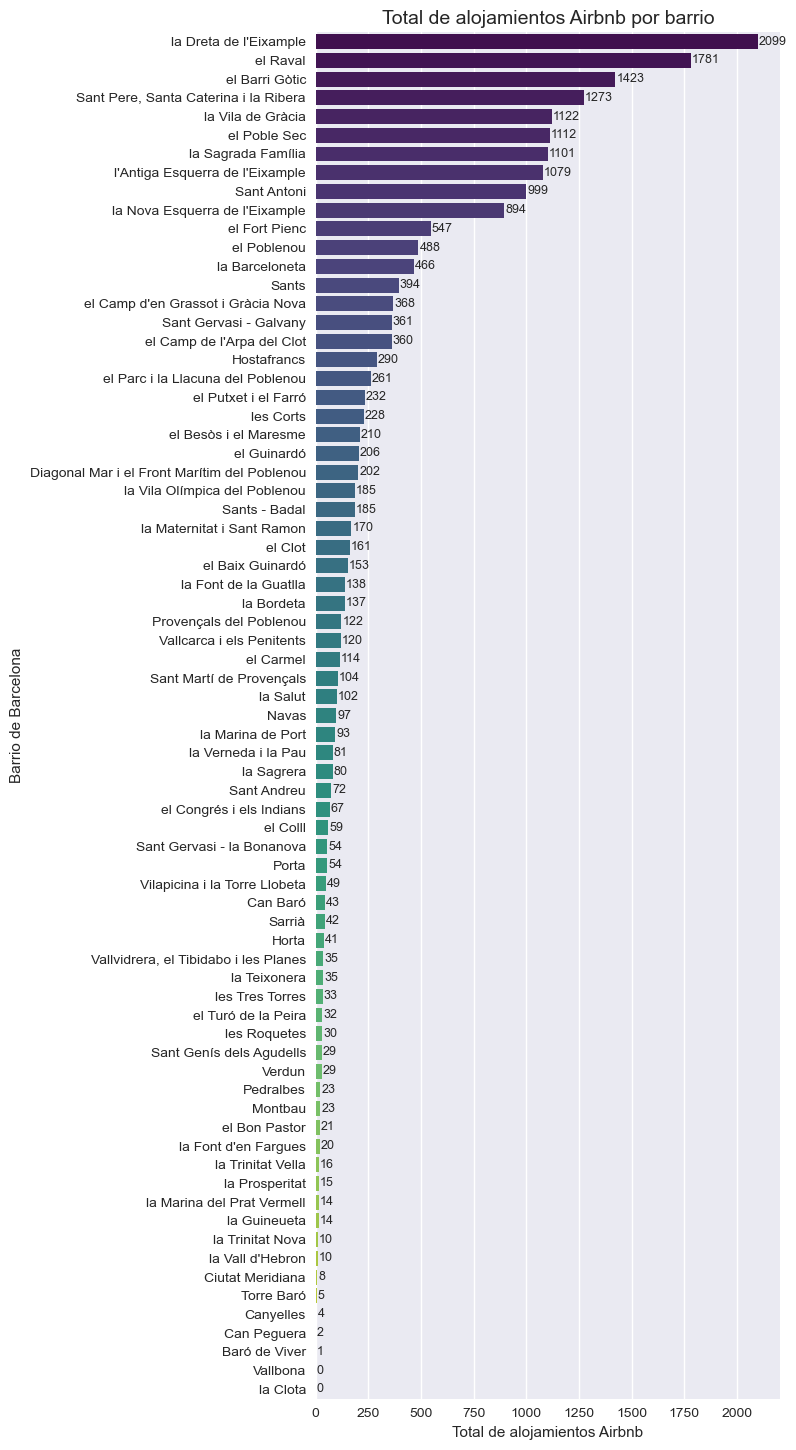

In [24]:
#Cantidad de Airbnb por barrio

df_barrio = df_filtrado.groupby('barrios_bcn', as_index=False)['total_airbnb'].sum()
df_barrio = df_barrio.sort_values('total_airbnb', ascending=False)
plt.figure(figsize=(8, len(df_barrio) * 0.2))
ax = sns.barplot(data=df_barrio, y='barrios_bcn', x='total_airbnb', palette='viridis')
for i, value in enumerate(df_barrio['total_airbnb']):
    ax.text(value + 5, i, f'{int(value)}', va='center', fontsize=9)
plt.title('Total de alojamientos Airbnb por barrio', fontsize=14)
plt.xlabel('Total de alojamientos Airbnb')
plt.ylabel('Barrio de Barcelona')
plt.tight_layout()
plt.show()


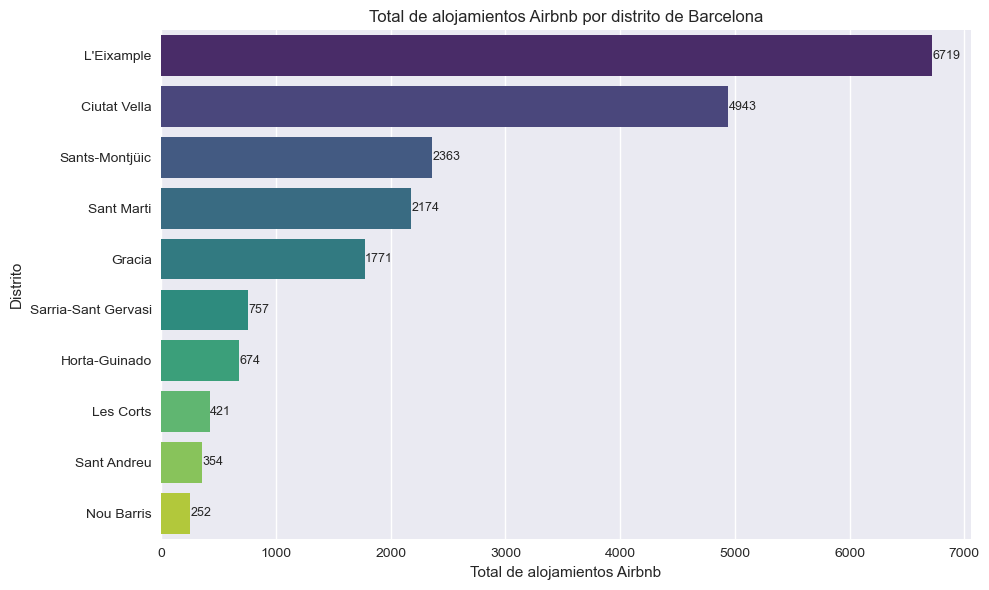

In [25]:
#Cantidad de Airbnb por distrito 
#Agrupar por nombre del distrito y sumar el total de alojamientos Airbnb
df_distrito = df_filtrado.groupby('nom_distrito', as_index=False)['total_airbnb'].sum()

# Ordenar de mayor a menor
df_distrito = df_distrito.sort_values('total_airbnb', ascending=False)

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_distrito, y='nom_distrito', x='total_airbnb', palette='viridis')

# Añadir etiquetas a cada barra
for i, value in enumerate(df_distrito['total_airbnb']):
    ax.text(value + 5, i, f'{int(value)}', va='center', fontsize=9)

# Añadir títulos y etiquetas
plt.title('Total de alojamientos Airbnb por distrito de Barcelona')
plt.xlabel('Total de alojamientos Airbnb')
plt.ylabel('Distrito')

plt.tight_layout()
plt.show()

## 2.1 Accesibilidad a la vivienda

### 2.1.1 Venta de Vivienda vs Airbnb

cod_distrito nom_distrito        barrios_bcn  indice_ingresos_2017  \
codigo                                                                       
50                 8   Nou Barris       les Roquetes                  49.7   
53                 8   Nou Barris   la Trinitat Nova                  48.2   
57                 9  Sant Andreu  la Trinitat Vella                  47.1   

        total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
50                 16250             12433           76.510769   
53                  7620              5861           76.916010   
57                 10337              7131           68.985199   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
50                    3380             20.800000            12832   
53                    1617             21.220472             5992   
57                    2893             27.986843             7425   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
50              78.966154               399            3.209201   
53              78.635171               131            2.235113   
57              71.829351               294            4.122844   

        n_residentes_20_34_años  pct_residentes_20_34_años  \
codigo                                                       
50                         3250                  20.000000   
53                         1449                  19.015748   
57                         2049                  19.821999   

        pct_var_esp_ residentes_1419  pct_var_no_ue_residentes_1419  \
codigo                                                                
50                         -1.528592                      29.007634   
53                         -4.512871                      33.746898   
57                         -1.952427                       5.738304   

        pct_var_ue_residentes_1419  pct_var_ue_inmi_1419  \
codigo                                                     
50                       -1.489329             -0.250000   
53                       -4.097311             19.090909   
57                       -1.237031             20.000000   

        dif_residentes_esp_1419  total_airbnb  pct_airbnb_vecindario  \
codigo                                                                 
50                         -193            30               0.146857   
53                         -277            10               0.048952   
57                         -142            16               0.078324   

        n_hab_ent  pct_hab_ent  pm_airbnb  pm_hab_ent  pct_var_airbnb1519  \
codigo                                                                      
50              8    26.666667    39.2000       44.75               900.0   
53              1    10.000000    29.2000       56.00               900.0   
57              3    18.750000    32.6875       45.00               700.0   

        pct_var_hab_ent_1519  pct_var_pm_airbnb_1519  \
codigo                                                 
50                     300.0              -38.750000   
53                       0.0              -61.066667   
57                     200.0              -41.103604   

        pct_var_pm_airbnb_ent_1519  pct_var_pm_hab_ent_1519  pct_airbnb  \
codigo                                                                    
50                      -36.971831               -23.428571    0.146857   
53                        0.000000               -65.037037    0.048952   
57                      -10.000000               -51.775956    0.078324   

        dif_pm_airbnb_1519  dif_pm_hab_ent_1519  n_viv_vendidas  \
codigo                                                            
50                -24.8000               -26.25             177   
53                -45.8000     

cod_distrito    nom_distrito  \
codigo                                 
11                 3  Sants-Montjüic   
56                 8      Nou Barris   
69                10      Sant Marti   

                                         barrios_bcn  indice_ingresos_2017  \
codigo                                                                       
11                                      el Poble Sec                  82.2   
56                                          Vallbona                  40.9   
69      Diagonal Mar i el Front Marítim del Poblenou                 150.1   

        total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
11                 40409             26937           66.660892   
56                  1407              1196           85.003554   
69                 13625             10919           80.139450   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
11                    9151             22.645945            30866   
56                     181             12.864250             1226   
69                    1534             11.258716            12015   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
11              76.383974              3929           14.585886   
56              87.135750                30            2.508361   
69              88.183486              1096           10.037549   

        n_residentes_20_34_años  pct_residentes_20_34_años  \
codigo                                                       
11                         9300                  23.014675   
56                          212                  15.067520   
69                         1797                  13.188991   

        pct_var_esp_ residentes_1419  pct_var_no_ue_residentes_1419  \
codigo                                                                
11                         -6.234336                       4.380062   
56                          1.528014                      28.368794   
69                         -1.630631                      31.335616   

        pct_var_ue_residentes_1419  pct_var_ue_inmi_1419  \
codigo                                                     
11                       -2.581745             32.916103   
56                        1.155116            -11.764706   
69                       -0.890869              7.135875   

        dif_residentes_esp_1419  total_airbnb  pct_airbnb_vecindario  \
codigo                                                                 
11                        -1791          1112               5.443509   
56                           18             0               0.000000   
69                         -181           202               0.988839   

        n_hab_ent  pct_hab_ent   pm_airbnb  pm_hab_ent  pct_var_airbnb1519  \
codigo                                                                       
11            575    51.708633   97.036871  143.725217           73.478939   
56              0     0.000000    0.000000    0.000000         -100.000000   
69            121    59.900990  233.524752  252.694215           94.230769   

        pct_var_hab_ent_1519  pct_var_pm_airbnb_1519  \
codigo                                                 
11                 34.345794               42.950529   
56               -100.000000             -100.000000   
69                 49.382716               26.988624   

        pct_var_pm_airbnb_ent_1519  pct_var_pm_hab_ent_1519  pct_airbnb  \
codigo                                                                    
11                       70.201962                33.025130    5.443509   
56                     -100.000000              -100.000000    0.000000   
69                       15.398497               -12.680115    0.988839   

        dif_pm_airbnb_1519

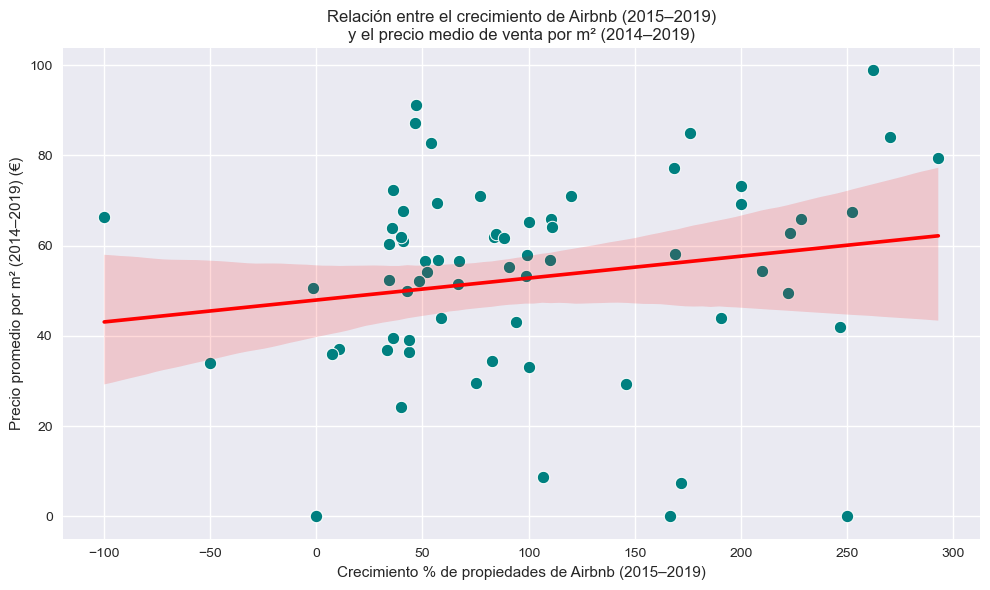

In [26]:
1#.¿Los barrios con mayor crecimiento de Airbnbs entre 2015 y 2019 presentan un incremento mayor 
#en el precio de venta de la vivienda, que los barrios con menor crecimiento de Airbnbs?

#Eje X: Crecimiento de Airbnbs (2015-2019): pct_var_airbnb1519
#Eje Y: Incremento en el precio de la vivienda ( pct_var_pm_alq_m21419 para alquileres, o pm_m2_1419 para ventas).
#Cada punto: Representa un barrio.

col = 'pct_var_airbnb1519'
df_visualizacion, df_outliers = filter_outliers(df_filtrado, col)
display(df_outliers)
col = 'pm_m2_1419'
df_visualizacion, df_outliers = filter_outliers(df_visualizacion, col)
display(df_outliers)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_visualizacion, x='pct_var_airbnb1519', y='pm_m2_1419', color='teal', s=80)

sns.regplot(data=df_visualizacion, x='pct_var_airbnb1519', y='pm_m2_1419', scatter=False, color='red')

plt.title("Relación entre el crecimiento de Airbnb (2015–2019)\ny el precio medio de venta por m² (2014–2019)")
plt.xlabel("Crecimiento % de propiedades de Airbnb (2015–2019)")
plt.ylabel("Precio promedio por m² (2014–2019) (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
filt = df_filtrado['pm_m2_1419'] > 150
df_filtrado[filt]

cod_distrito    nom_distrito   barrios_bcn  indice_ingresos_2017  \
codigo                                                                     
11                 3  Sants-Montjüic  el Poble Sec                  82.2   

        total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
11                 40409             26937           66.660892   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
11                    9151             22.645945            30866   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
11              76.383974              3929           14.585886   

        n_residentes_20_34_años  pct_residentes_20_34_años  \
codigo                                                       
11                         9300                  23.014675   

        pct_var_esp_ residentes_1419  pct_var_no_ue_residentes_1419  \
codigo                                                                
11                         -6.234336                       4.380062   

        pct_var_ue_residentes_1419  pct_var_ue_inmi_1419  \
codigo                                                     
11                       -2.581745             32.916103   

        dif_residentes_esp_1419  total_airbnb  pct_airbnb_vecindario  \
codigo                                                                 
11                        -1791          1112               5.443509   

        n_hab_ent  pct_hab_ent  pm_airbnb  pm_hab_ent  pct_var_airbnb1519  \
codigo                                                                      
11            575    51.708633  97.036871  143.725217           73.478939   

        pct_var_hab_ent_1519  pct_var_pm_airbnb_1519  \
codigo                                                 
11                 34.345794               42.950529   

        pct_var_pm_airbnb_ent_1519  pct_var_pm_hab_ent_1519  pct_airbnb  \
codigo                                                                    
11                       70.201962                 33.02513    5.443509   

        dif_pm_airbnb_1519  dif_pm_hab_ent_1519  n_viv_vendidas  \
codigo                                                            
11               29.155435            59.281292             399   

        n_viv_nuevas_vendidas  pct_viv_nuevas_vendidas    prom_m2  \
codigo                                                              
11                          5                 1.253133  82.366667   

        prom_m2_nuevo  prom_m2_seg_mano  pm_viv_vendidas  \
codigo                                                     
11               77.0             61.55            282.6   

        pm_viv_vendidas_nuevas  pm_viv_vendidas_seg_mano   pm_m2  pm_m2_nuevo  \
codigo                                                                          
11                       200.0                     286.2  4329.1       2557.8   

        pm_m2_seg_mano  pct_var_viv_vendidas1419  \
codigo                                             
11              4405.3                 32.119205   

        pct_var_viv_nuevas_vendidas1419  pct_var_viv_seg_mano_vendidas1419  \
codigo                                                                       
11                                  0.0                          30.463576   

        pct_var_pm_viv_vendidas1419  pct_var_pm_viv_nuevas_vendidas1419  \
codigo                                                                    
11                       197.473684                                 0.0   

        pct_var_pm_viv_seg_mano_vendidas1419  pm_m2_1419  \
codigo                                                     
11                                201.263158  169.356645   

        pct_var_pm_m2_viv_nuevas_vendidas1419  \
codigo                                          
11          

In [28]:
#Calculando el coeficiente de Pearson para evaluar la fuerza y dirección de la relación entre el crecimiento de Airbnb y el precio medio por metro cuadrado 
x = df_filtrado['pct_var_airbnb1519']
y = df_filtrado['pm_m2_1419']
coef, p_valor = pearsonr(x, y)
print(f"Coeficiente de correlación de Pearson: {coef:.3f}")
print(f"Valor p: {p_valor:.4f}")

Coeficiente de correlación de Pearson: 0.166
Valor p: 0.1615


barrios_bcn  total_airbnb
codigo                                          
12      la Marina del Prat Vermell            14
21                       Pedralbes            23
36            la Font d'en Fargues            20
39        Sant Genís dels Agudells            29
40                         Montbau            23
41                la Vall d'Hebron            10
42                        la Clota             0
47                     Can Peguera             2
48                    la Guineueta            14
49                       Canyelles             4
51                          Verdun            29
52                  la Prosperitat            15
53                la Trinitat Nova            10
54                      Torre Baró             5
55                Ciutat Meridiana             8
56                        Vallbona             0
57               la Trinitat Vella            16
58                   Baró de Viver             1
59                   el Bon Pastor            21

Empty DataFrame
Columns: [barrios_bcn, pm_m2]
Index: []

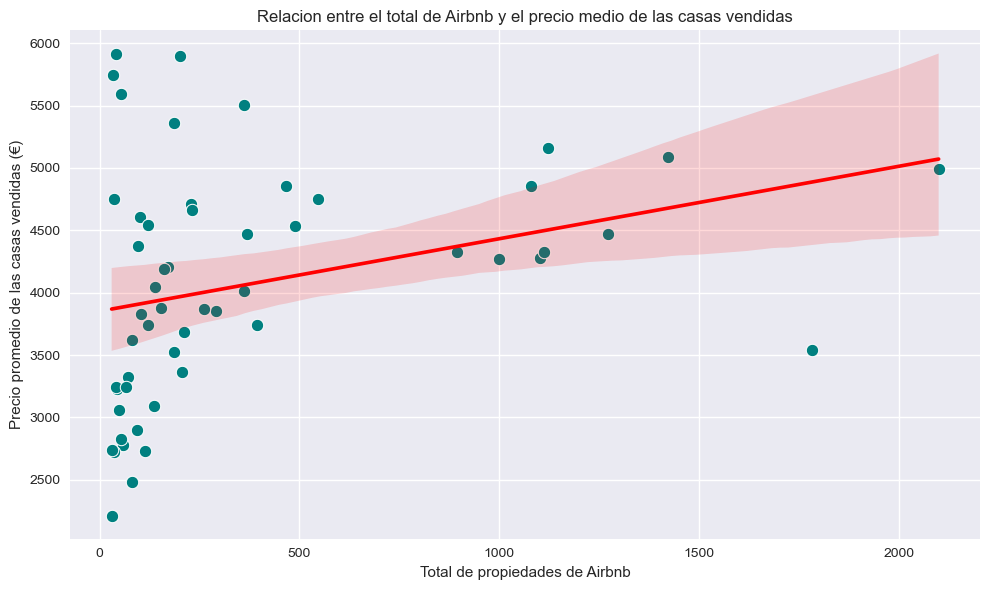

In [29]:
# Pregunta 1 con otras variables :
# Eje X: Total airbnb( total_airbnb)
#Eje Y: Precio medio de las casas vendidas ( pm_viv_vendidas)
#Cada punto: Representa un barrio.

col = 'total_airbnb'
filt = df_filtrado[col] > df_filtrado[col].quantile(0.25)
df_visualizacion = df_filtrado[filt]
display(df_filtrado[~filt][['barrios_bcn','total_airbnb']])
#df_visualizacion, df_outliers = filter_outliers(df_visualizacion, col)
#display(df_outliers[['barrios_bcn', 'total_airbnb']])

col = 'pm_m2'
df_visualizacion, df_outliers = filter_outliers(df_visualizacion, col)
display(df_outliers[['barrios_bcn','pm_m2']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_visualizacion, x='total_airbnb', y='pm_m2', color='teal', s=80)

sns.regplot(data=df_visualizacion, x='total_airbnb', y='pm_m2', scatter=False, color='red')

plt.title("Relacion entre el total de Airbnb y el precio medio de las casas vendidas")
plt.xlabel("Total de propiedades de Airbnb")
plt.ylabel("Precio promedio de las casas vendidas (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
df_filtrado['total_airbnb'].describe()

count      73.000000
mean      279.835616
std       443.819033
min         0.000000
25%        29.000000
50%        97.000000
75%       261.000000
max      2099.000000
Name: total_airbnb, dtype: float64

In [31]:
df_filtrado['pm_viv_vendidas'].quantile(0.25)

192.6

In [32]:
list(df_filtrado.columns)

['cod_distrito',
 'nom_distrito',
 'barrios_bcn',
 'indice_ingresos_2017',
 'total_residentes',
 'n_residentes_esp',
 'pct_residentes_esp',
 'n_residentes_no_ue',
 'pct_residentes_no_ue',
 'n_residentes_ue',
 'pct_residentes_ue',
 'n_inmigrantes_ue',
 'pct_inmigrantes_ue',
 'n_residentes_20_34_años',
 'pct_residentes_20_34_años',
 'pct_var_esp_ residentes_1419',
 'pct_var_no_ue_residentes_1419',
 'pct_var_ue_residentes_1419',
 'pct_var_ue_inmi_1419',
 'dif_residentes_esp_1419',
 'total_airbnb',
 'pct_airbnb_vecindario',
 'n_hab_ent',
 'pct_hab_ent',
 'pm_airbnb',
 'pm_hab_ent',
 'pct_var_airbnb1519',
 'pct_var_hab_ent_1519',
 'pct_var_pm_airbnb_1519',
 'pct_var_pm_airbnb_ent_1519',
 'pct_var_pm_hab_ent_1519',
 'pct_airbnb',
 'dif_pm_airbnb_1519',
 'dif_pm_hab_ent_1519',
 'n_viv_vendidas',
 'n_viv_nuevas_vendidas',
 'pct_viv_nuevas_vendidas',
 'prom_m2',
 'prom_m2_nuevo',
 'prom_m2_seg_mano',
 'pm_viv_vendidas',
 'pm_viv_vendidas_nuevas',
 'pm_viv_vendidas_seg_mano',
 'pm_m2',
 'pm_m2_n

In [33]:
df_filtrado.corrwith(df_filtrado['pm_viv_vendidas'], numeric_only=True).abs().sort_values().tail(20)

dif_pm_viv_nueva_vendidas1419       0.452716
dif_pm_viv_seg_mano_vendidas1419    0.460932
pct_var_viv_vendidas1419            0.485223
dif_pm_alq1419                      0.488571
pm_m2_alq19                         0.496073
pct_hab_ent                         0.506962
pm_alq_m2_14                        0.513118
pm_m2_nuevo                         0.528109
pm_viv_vendidas_nuevas              0.616712
m_m2_viv_alq14                      0.681955
pm_alq_14                           0.757645
pm_alq19                            0.771733
pm_m2_viv_alq19                     0.803234
pm_m2_seg_mano                      0.865038
prom_m2_seg_mano                    0.878607
pm_m2                               0.895698
prom_m2                             0.904908
indice_ingresos_2017                0.917576
pm_viv_vendidas_seg_mano            0.986111
pm_viv_vendidas                     1.000000
dtype: float64

In [34]:
features = ['total_airbnb', 'n_hab_ent', 'pm_viv_vendidas_seg_mano','indice_ingresos_2017','prom_m2','pm_m2','prom_m2_seg_mano','pm_m2_seg_mano','pm_m2_viv_alq19','pm_alq19','pm_alq_14']
corr_matrix = df_filtrado[features].corr(numeric_only=True)

<Axes: >

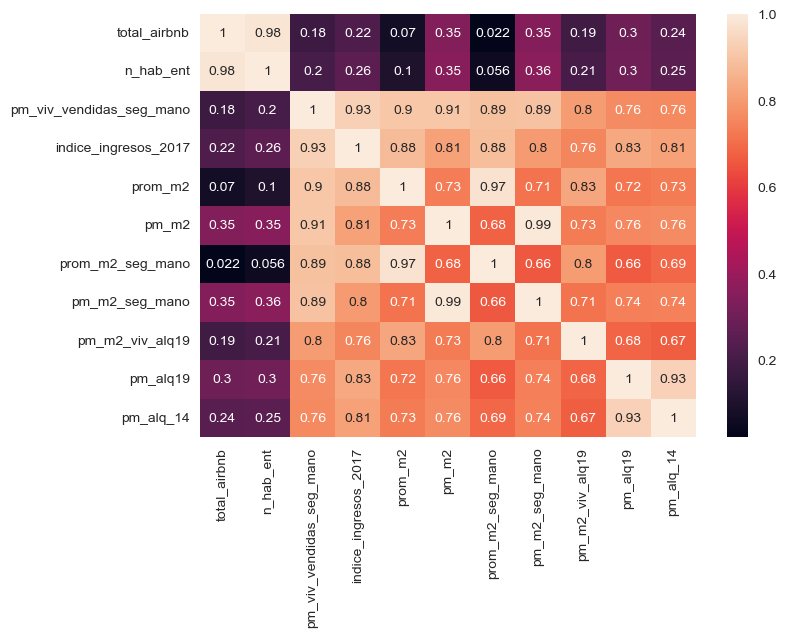

In [35]:
sns.heatmap(corr_matrix, annot=True)

### 2.1.2 Alquiler vs Airbnb

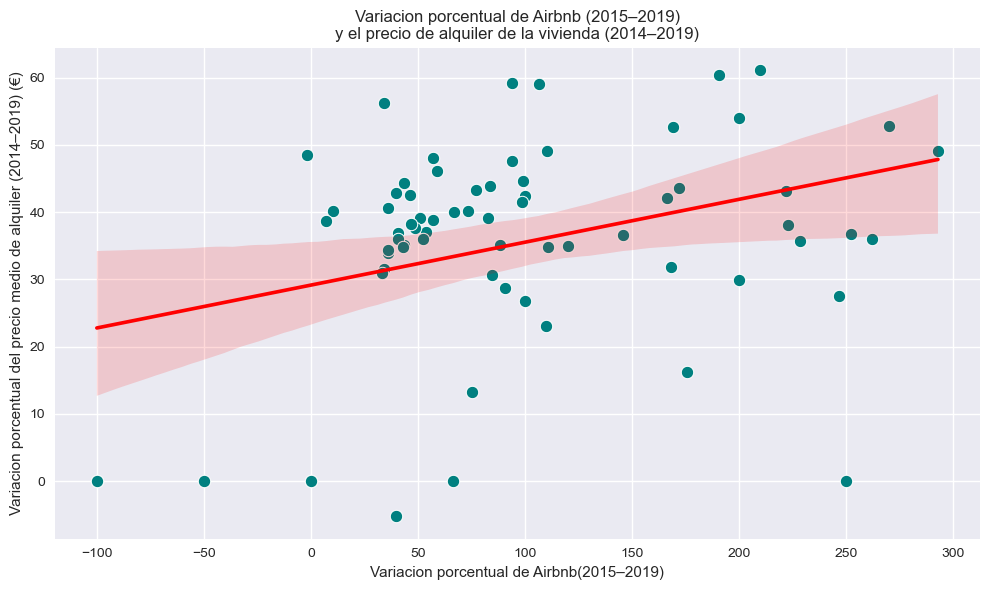

In [36]:
#2.¿Los precios de alquiler de los barrios de alta concentración turística ha aumentado más rápidamente que la de 
#los barrios de baja concentración turística?

# Eje X: Crecimiento de Airbnbs (2015-2019): pct_var_airbnb1519
#Eje Y: Variacion porcentual del precio medio del alquiler de la vivienda(2014-2019) ( pct_var_pm_alq_m21419 ).
#Cada punto: Representa un barrio.

plt.figure(figsize=(10, 6))
filt = df_filtrado['pct_var_airbnb1519'] < 400
sns.scatterplot(data=df_filtrado[filt], x='pct_var_airbnb1519', y='pct_var_pm_alq_m21419', color='teal', s=80)

sns.regplot(data=df_filtrado[filt], x='pct_var_airbnb1519', y='pct_var_pm_alq_m21419', scatter=False, color='red')

plt.title("Variacion porcentual de Airbnb (2015–2019)\ny el precio de alquiler de la vivienda (2014–2019)")
plt.xlabel("Variacion porcentual de Airbnb(2015–2019)")
plt.ylabel("Variacion porcentual del precio medio de alquiler (2014–2019) (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
df_filtrado.isna().sum().tail()

pct_var_pm_alq_m21419      0
n_hoteles_2019             1
n_establecimientos_2016    1
n_establecimientos_2014    1
diferencia_n_est_14_16     1
dtype: int64

In [38]:
df_filtrado[df_filtrado['n_hoteles_2019'].isna()]

cod_distrito nom_distrito          barrios_bcn  indice_ingresos_2017  \
codigo                                                                         
73                10   Sant Marti  la Verneda i la Pau                  57.0   

        total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
73                 28883             24903           86.220268   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
73                    3299             11.421944            25518   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
73              88.349548               615            2.469582   

        n_residentes_20_34_años  pct_residentes_20_34_años  \
codigo                                                       
73                         4602                  15.933248   

        pct_var_esp_ residentes_1419  pct_var_no_ue_residentes_1419  \
codigo                                                                
73                         -3.908782                      35.761317   

        pct_var_ue_residentes_1419  pct_var_ue_inmi_1419  \
codigo                                                     
73                       -3.381167             24.242424   

        dif_residentes_esp_1419  total_airbnb  pct_airbnb_vecindario  \
codigo                                                                 
73                        -1013            81               0.396515   

        n_hab_ent  pct_hab_ent  pm_airbnb  pm_hab_ent  pct_var_airbnb1519  \
codigo                                                                      
73              8     9.876543  37.382716      87.375               200.0   

        pct_var_hab_ent_1519  pct_var_pm_airbnb_1519  \
codigo                                                 
73                      60.0                2.262749   

        pct_var_pm_airbnb_ent_1519  pct_var_pm_hab_ent_1519  pct_airbnb  \
codigo                                                                    
73                        48.09322                 2.763983    0.396515   

        dif_pm_airbnb_1519  dif_pm_hab_ent_1519  n_viv_vendidas  \
codigo                                                            
73                 0.82716               28.375             365   

        n_viv_nuevas_vendidas  pct_viv_nuevas_vendidas  prom_m2  \
codigo                                                            
73                         23                  6.30137   70.775   

        prom_m2_nuevo  prom_m2_seg_mano  pm_viv_vendidas  \
codigo                                                     
73             63.075             71.35            172.0   

        pm_viv_vendidas_nuevas  pm_viv_vendidas_seg_mano   pm_m2  pm_m2_nuevo  \
codigo                                                                          
73                       162.5                     173.0  2480.0       2697.0   

        pm_m2_seg_mano  pct_var_viv_vendidas1419  \
codigo                                             
73              2458.0                 76.842105   

        pct_var_viv_nuevas_vendidas1419  pct_var_viv_seg_mano_vendidas1419  \
codigo                                                                       
73                            30.769231                          82.285714   

        pct_var_pm_viv_vendidas1419  pct_var_pm_viv_nuevas_vendidas1419  \
codigo                                                                    
73                        74.442191                           87.644342   

        pct_var_pm_viv_seg_mano_vendidas1419  pm_m2_1419  \
codigo                                                     
73                                 72.139303   73.184358   

        pct_var_pm_m2_viv_nuevas_vendidas1419  \
codigo                                          
73    

In [39]:
# Rellenar nulos con ceros
print(df_filtrado.isna().sum())
df_filtrado= df_filtrado.fillna(0)
print(df_filtrado.isna().sum())

cod_distrito               0
nom_distrito               0
barrios_bcn                0
indice_ingresos_2017       0
total_residentes           0
                          ..
pct_var_pm_alq_m21419      0
n_hoteles_2019             1
n_establecimientos_2016    1
n_establecimientos_2014    1
diferencia_n_est_14_16     1
Length: 76, dtype: int64
cod_distrito               0
nom_distrito               0
barrios_bcn                0
indice_ingresos_2017       0
total_residentes           0
                          ..
pct_var_pm_alq_m21419      0
n_hoteles_2019             0
n_establecimientos_2016    0
n_establecimientos_2014    0
diferencia_n_est_14_16     0
Length: 76, dtype: int64


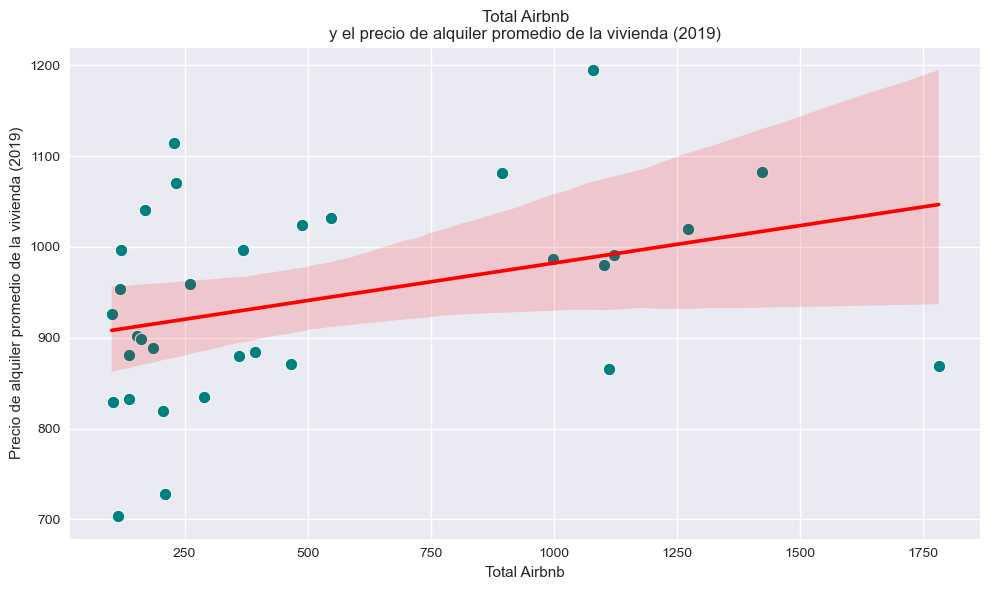

In [40]:
#Pregunta 2 con otras variables:
#2.¿Los precios de alquiler de los barrios de alta concentracion turística ha aumentado más rápidamente que la de 
#los barrios de baja concentración turística?

#Eje X: Total Airbnb (total_airbnb)
#Eje Y: Precio medio de alquiler en 2019 (pm_alq19)
#Cada punto: Representa un barrio

filt_a = df_filtrado['total_airbnb'] > 100
filt_b = df_filtrado['pm_alq19'] < 1200
filt = filt_a & filt_b

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado[filt], x='total_airbnb', y='pm_alq19', color='teal', s=80)

sns.regplot(data=df_filtrado[filt], x='total_airbnb', y='pm_alq19', scatter=False, color='red')

plt.title("Total Airbnb\ny el precio de alquiler promedio de la vivienda (2019)")
plt.xlabel("Total Airbnb")
plt.ylabel("Precio de alquiler promedio de la vivienda (2019)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.1.3 Viviendas disponibles vs Densidad Airbnb

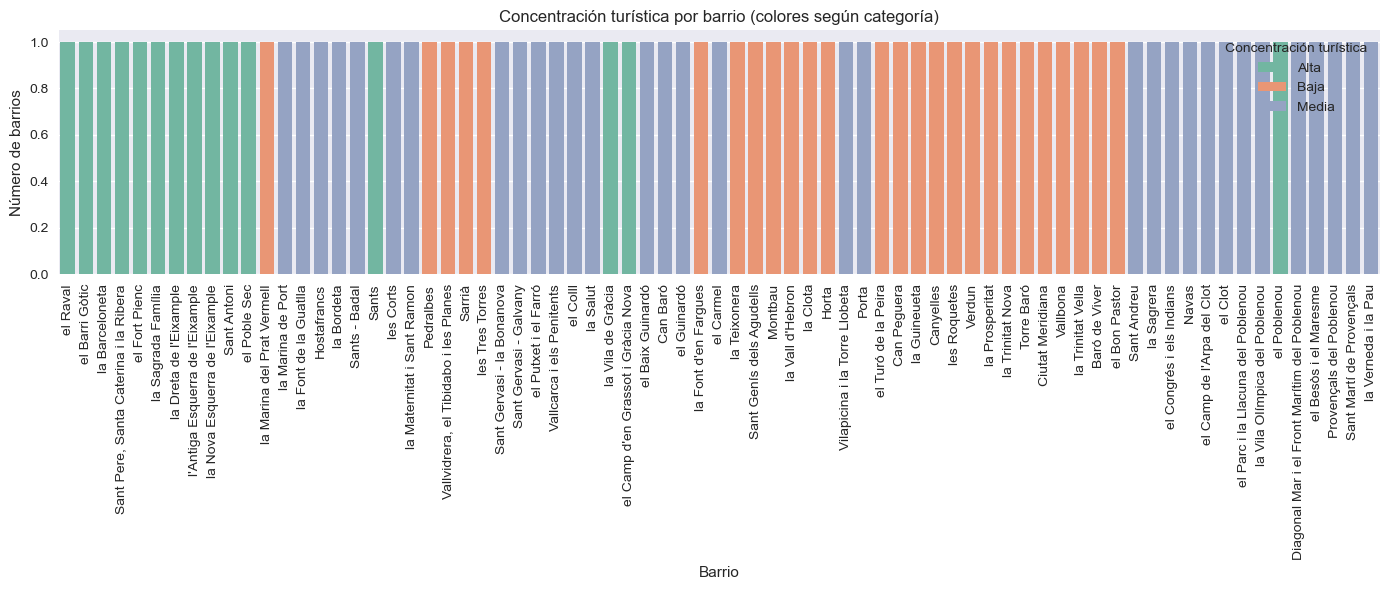

In [41]:
#3. ¿El número de viviendas disponibles para alquiler residencial ha disminuido en barrios con mayor densidad de 
#oferta Airbnb??

#3.1 Histograma para clasificar densidad de Airbnb (categorias: alta, media, baja)

# Calcular percentiles definidos de acuerdo al conocimiento de los datos.
p35 = df_filtrado['total_airbnb'].quantile(0.35)
p80 = df_filtrado['total_airbnb'].quantile(0.80)
def clasificar_concentracion(valor):
    if valor >= p80:
        return 'Alta'
    elif valor <= p35:
        return 'Baja'
    else:
        return 'Media'
# Nueva columna
df_filtrado['concentracion_turistica'] = df_filtrado['total_airbnb'].apply(clasificar_concentracion)

plt.figure(figsize=(14, 6))
sns.countplot(data=df_filtrado, x='barrios_bcn', hue='concentracion_turistica', palette='Set2')
plt.title('Concentración turística por barrio (colores según categoría)')
plt.xlabel('Barrio')
plt.ylabel('Número de barrios')
plt.xticks(rotation=90)
plt.legend(title='Concentración turística')
plt.tight_layout()
plt.show()


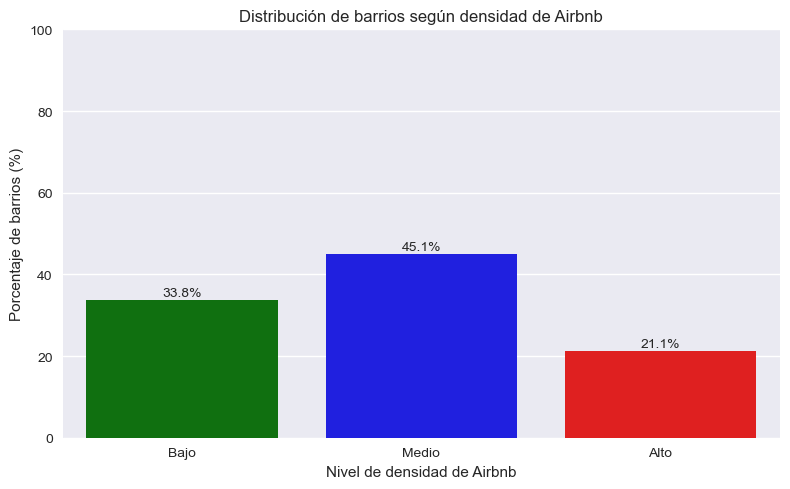

In [42]:
#3.2 Histograma de la densidad de airbnb (considerando la poblacion residente):

# Colores definidos para por nivel de densidad:
colores_nivel_airbnb = {
    'Alto': 'red',
    'Medio': 'blue',
    'Bajo': 'green'
}

df_filtrado['densidad_airbnb'] = df_filtrado['total_airbnb'] / df_filtrado['total_residentes']

df_filtrado['nivel_airbnb'] = pd.cut(
    df_filtrado['densidad_airbnb'], 
    bins=[
        df_filtrado['densidad_airbnb'].quantile(0),
        df_filtrado['densidad_airbnb'].quantile(0.35),
        df_filtrado['densidad_airbnb'].quantile(0.80),
        df_filtrado['densidad_airbnb'].quantile(1.0)
    ], 
    labels=['Bajo', 'Medio', 'Alto']
)

conteo_niveles = df_filtrado['nivel_airbnb'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 5))
sns.barplot(
    x=conteo_niveles.index,
    y=conteo_niveles.values,
    palette=colores_nivel_airbnb  
)
plt.title("Distribución de barrios según densidad de Airbnb")
plt.ylabel("Porcentaje de barrios (%)")
plt.xlabel("Nivel de densidad de Airbnb")
plt.ylim(0, 100)

for i, v in enumerate(conteo_niveles.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

In [43]:
pd.set_option("display.max_columns", None)

In [44]:
df_filtrado

cod_distrito  nom_distrito  \
codigo                               
1                  1  Ciutat Vella   
2                  1  Ciutat Vella   
3                  1  Ciutat Vella   
4                  1  Ciutat Vella   
5                  2    L'Eixample   
...              ...           ...   
69                10    Sant Marti   
70                10    Sant Marti   
71                10    Sant Marti   
72                10    Sant Marti   
73                10    Sant Marti   

                                         barrios_bcn  indice_ingresos_2017  \
codigo                                                                       
1                                           el Raval                  71.2   
2                                     el Barri Gòtic                 106.1   
3                                     la Barceloneta                  79.6   
4              Sant Pere, Santa Caterina i la Ribera                  99.4   
5                                      el Fort Pienc                 106.5   
...                                              ...                   ...   
69      Diagonal Mar i el Front Marítim del Poblenou                 150.1   
70                             el Besòs i el Maresme                  60.4   
71                           Provençals del Poblenou                 102.3   
72                          Sant Martí de Provençals                  67.4   
73                               la Verneda i la Pau                  57.0   

        total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
1                  48297             23230           48.098226   
2                  19180              8387           43.727842   
3                  15173              9246           60.937191   
4                  23170             12743           54.997842   
5                  32649             24489           75.006891   
...                  ...               ...                 ...   
69                 13625             10919           80.139450   
70                 24660             16843           68.300892   
71                 21303             17835           83.720603   
72                 26168             22567           86.238918   
73                 28883             24903           86.220268   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
1                    19380             40.126716            28409   
2                     6745             35.166840            11999   
3                     3049             20.094905            11857   
4                     5173             22.326284            17410   
5                     4976             15.240896            27410   
...                    ...                   ...              ...   
69                    1534             11.258716            12015   
70                    6853             27.789943            17757   
71                    2289             10.744965            18938   
72                    2755             10.528126            23319   
73                    3299             11.421944            25518   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
1               58.821459              5179           22.294447   
2               62.559958              3612           43.066651   
3               78.145390              2611           28.239239   
4               75.140268              4667           36.624029   
5               83.953567              2921           11.927804   
...                   ...               ...                 ...   
69              88.183486              1096           10.037549   
70              72.007299               914            5.426587   
71              88.898277              1103            6.184469   
72  

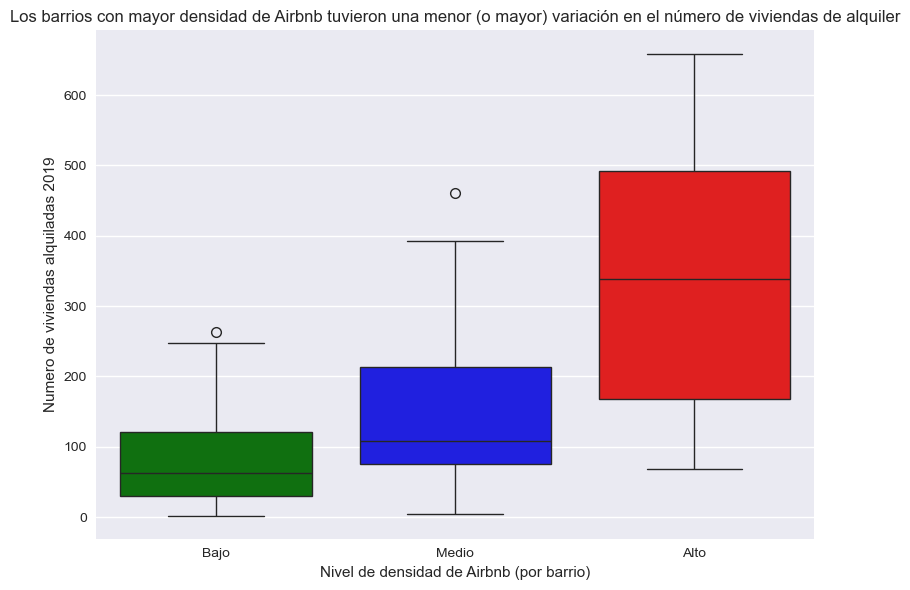

In [45]:
#3.3 Box Plot para responder a la pregunta 3.	¿El número de viviendas disponibles para alquiler residencial ha 
#disminuido en barrios con mayor densidad de Airbnb?
#Eje X: nivel_airbnb (baja, media, alta)
#Eje Y: n_viv_alq
    
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtrado, x='nivel_airbnb', y='n_viv_alq', palette=colores_nivel_airbnb)

plt.title('Los barrios con mayor densidad de Airbnb tuvieron una menor (o mayor) variación en el número de viviendas de alquiler')
plt.xlabel('Nivel de densidad de Airbnb (por barrio)')
plt.ylabel('Numero de viviendas alquiladas 2019')

plt.tight_layout()
plt.show()

<Axes: xlabel='total_airbnb', ylabel='pm_alq19'>

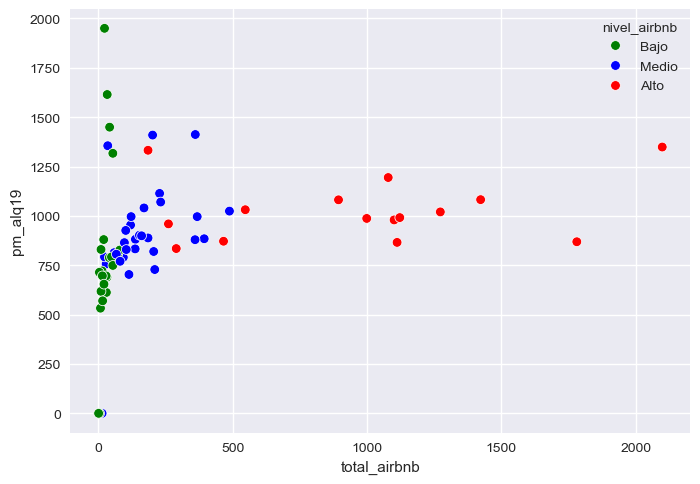

In [46]:
#4. #sns.regplot(data=df_merge, x='total_airbnb', y='pm_alq19', scatter=False, color='red')
sns.scatterplot(data=df_filtrado, x='total_airbnb', y='pm_alq19', hue='nivel_airbnb',palette=colores_nivel_airbnb)

## 2.2 Transformacion Demográfica

### 2.2.1 Relación entre Airbnb y población residente

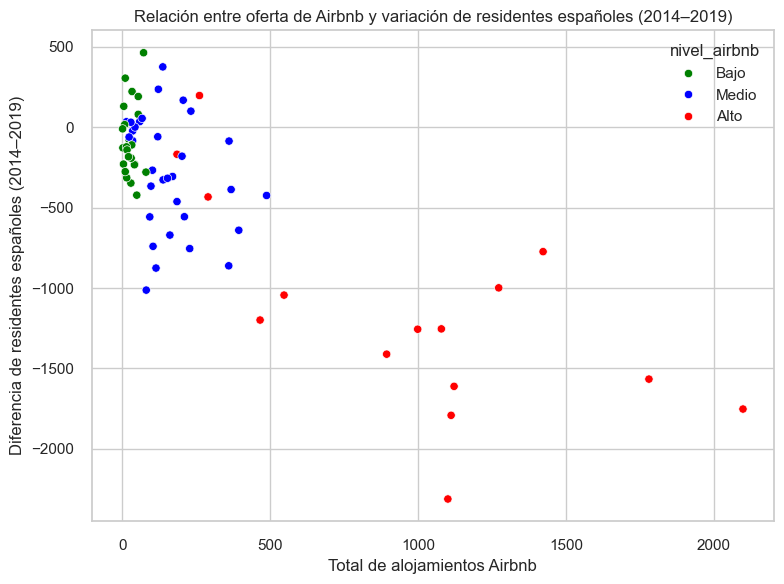

In [47]:
# 1 ¿Los barrios con mayor oferta de Airbnb tienen menor crecimiento o pérdida de residentes españoles entre 2014 y 2019?
#Eje X = total_airbnb
#Eje Y = dif_residentes_esp_1419

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(
   data=df_filtrado,
   x='total_airbnb',
   y='dif_residentes_esp_1419',
   hue='nivel_airbnb', # para ver agrupacion por densidad
   palette=colores_nivel_airbnb
  
)

plt.title('Relación entre oferta de Airbnb y variación de residentes españoles (2014–2019)')
plt.xlabel('Total de alojamientos Airbnb')
plt.ylabel('Diferencia de residentes españoles (2014–2019)')
plt.tight_layout()
plt.show()


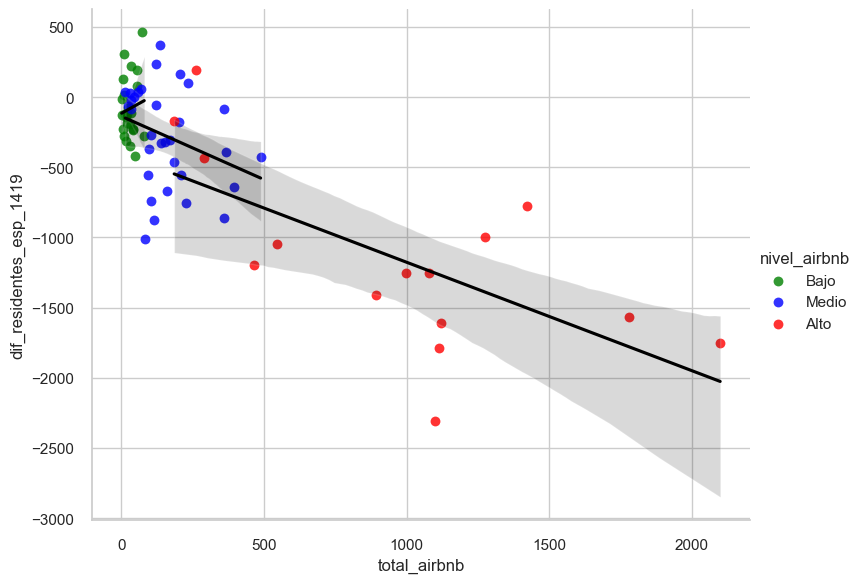

In [48]:
#Con linea de regresion
sns.lmplot(
   data=df_filtrado,
   x='total_airbnb',
   y='dif_residentes_esp_1419',
   height=6,
   aspect=1.3,
   scatter_kws={'s': 50},
   line_kws={"color": "black"},
   hue='nivel_airbnb',
   palette=colores_nivel_airbnb
)

In [49]:
#Interpretacion: se puede ver que a mayor concentracion turistica, menor poblacion española 

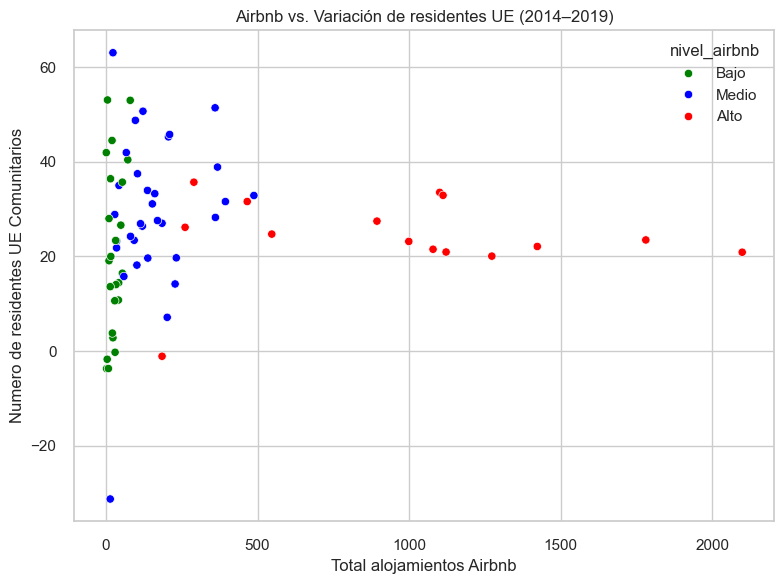

In [50]:
#2. ¿Se asocian mayores niveles de Airbnb, con un aumento de residentes extranjeros (UE o No-UE)?
#Eje X = total_airbnb 
#Eje Y = pct_var_ue_inmi_1419 y/o n_inmigrantes_ue

sns.set(style="whitegrid")

# Gráfico 1: Airbnb vs variación porcentual de residentes de la UE
plt.figure(figsize=(8, 6))
sns.scatterplot(
   data=df_filtrado,
   x='total_airbnb',
   y='pct_var_ue_inmi_1419',
   hue='nivel_airbnb',
   palette=colores_nivel_airbnb
)
plt.title('Airbnb vs. Variación de residentes UE (2014–2019)')
plt.xlabel('Total alojamientos Airbnb')
plt.ylabel('Numero de residentes UE Comunitarios')
plt.tight_layout()
plt.show()

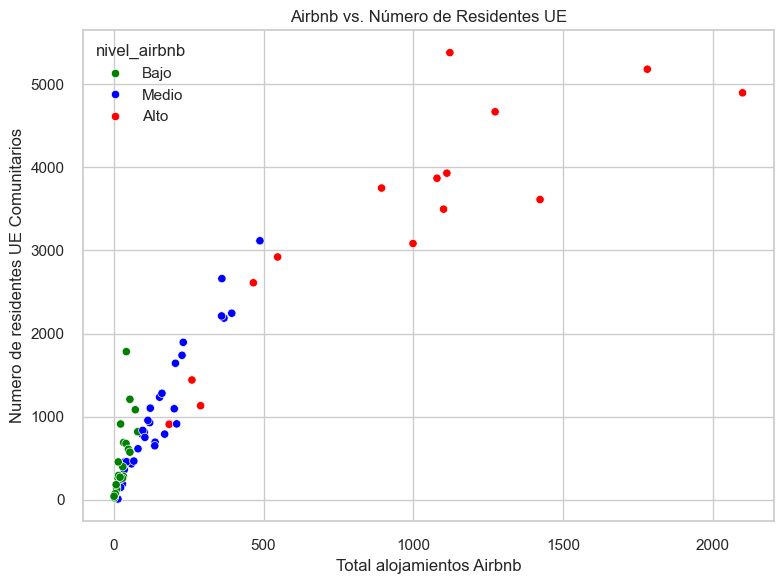

In [51]:
#Mismo gráfico anterior, utilizando el número de residentes UE y no la variación porcentual
#Eje X = total_airbnb 
#Eje Y = n_inmigrantes_ue

sns.set(style="whitegrid")

# Gráfico 2: Airbnb vs. Numero de residentes comunitarios
plt.figure(figsize=(8, 6))
sns.scatterplot(
   data=df_filtrado,
   x='total_airbnb',
   y='n_inmigrantes_ue',
   hue='nivel_airbnb',
   palette=colores_nivel_airbnb
)
plt.title('Airbnb vs. Número de Residentes UE')
plt.xlabel('Total alojamientos Airbnb')
plt.ylabel('Numero de residentes UE Comunitarios')
plt.tight_layout()
plt.show()

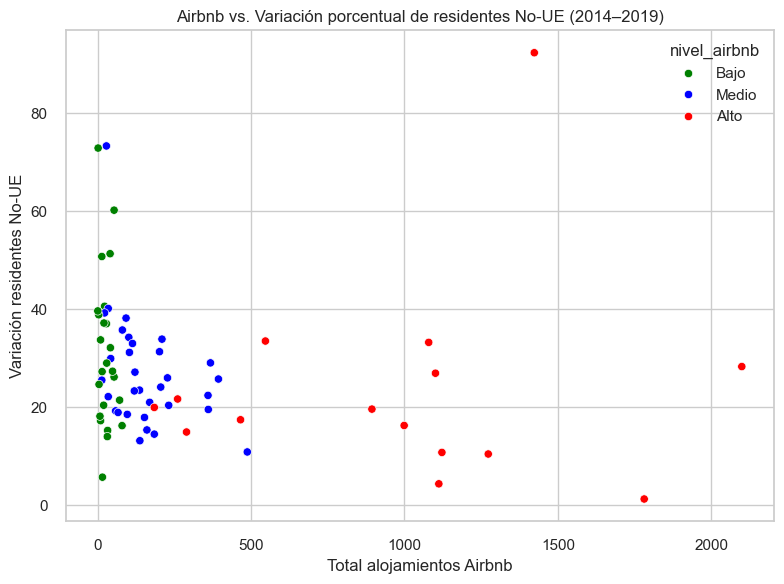

<Figure size 800x550 with 0 Axes>

In [52]:
# Gráfico 3: Airbnb vs. variación porcentual de residentes No-UE
#Eje X = total_airbnb 
#Eje Y = pct_var_no_ue_residentes_1419

plt.figure(figsize=(8, 6))
sns.scatterplot(
   data=df_filtrado,
   x='total_airbnb',
   y='pct_var_no_ue_residentes_1419',
   hue='nivel_airbnb', 
   palette=colores_nivel_airbnb
)
plt.title('Airbnb vs. Variación porcentual de residentes No-UE (2014–2019)')
plt.xlabel('Total alojamientos Airbnb')
plt.ylabel('Variación residentes No-UE')
plt.tight_layout()
plt.show()
plt.savefig("AirBnB_vs_Variacion_Residentes.png")


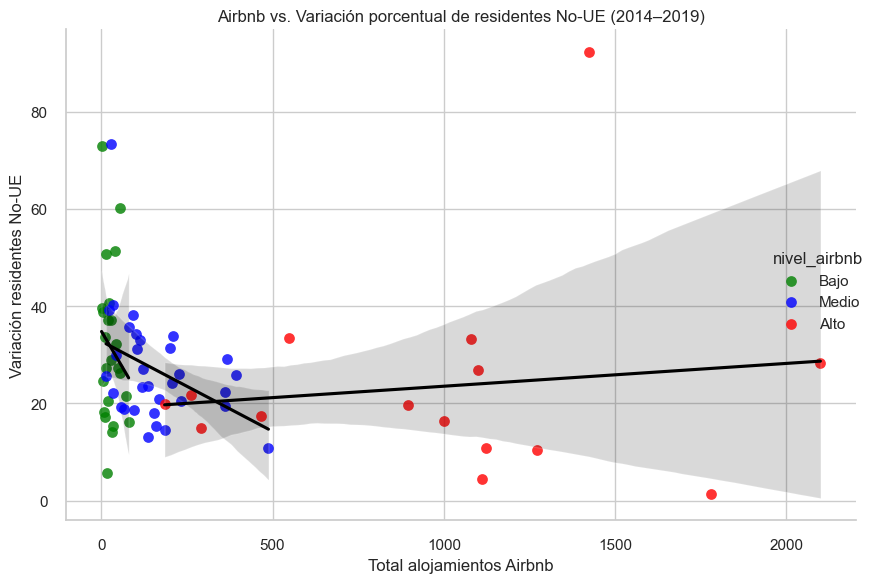

<Figure size 800x550 with 0 Axes>

In [53]:
#Con linea de regresion
sns.lmplot(
   data=df_filtrado,
   x='total_airbnb',
   y='pct_var_no_ue_residentes_1419',
   height=6,
   aspect=1.3,
   scatter_kws={'s': 60},
   line_kws={"color": "black"},
   hue='nivel_airbnb', 
   palette=colores_nivel_airbnb
)
plt.title('Airbnb vs. Variación porcentual de residentes No-UE (2014–2019)')
plt.xlabel('Total alojamientos Airbnb')
plt.ylabel('Variación residentes No-UE')
plt.tight_layout()
plt.show()
plt.savefig("AirBnB_vs_Variacion_Residentes.png")

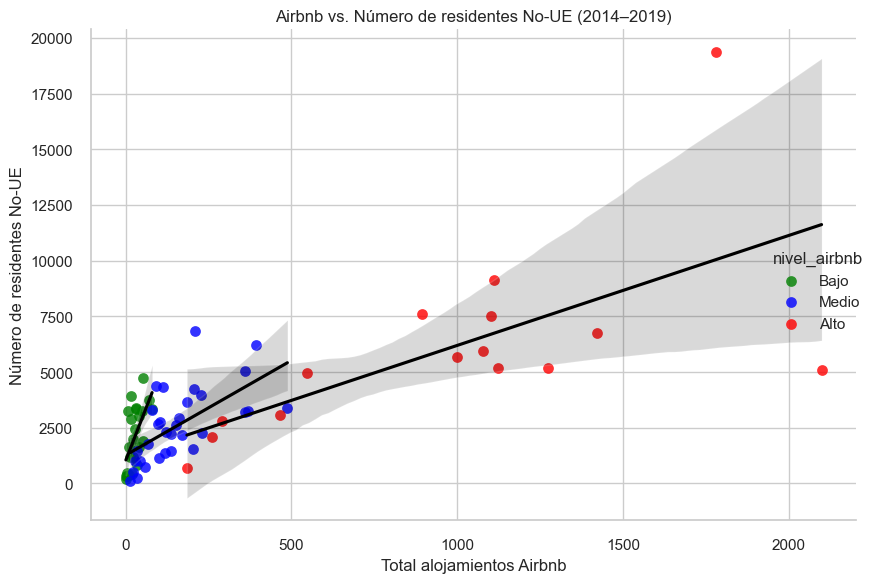

In [54]:
#Mismo gráfico anterior, utilizando el número de residentes NO-UE y no la variación porcentual
#Eje X = total_airbnb 
#Eje Y = n_residentes_no_ue

sns.lmplot(
   data=df_filtrado,
   x='total_airbnb',
   y='n_residentes_no_ue',
   height=6,
   aspect=1.3,
   scatter_kws={'s': 60},
   line_kws={"color": "black"},
   hue='nivel_airbnb',
   palette=colores_nivel_airbnb
)
plt.title('Airbnb vs. Número de residentes No-UE (2014–2019)')
plt.xlabel('Total alojamientos Airbnb')
plt.ylabel('Número de residentes No-UE')
plt.tight_layout()
plt.show()

### 2.2.2 Diversidad y Turismo

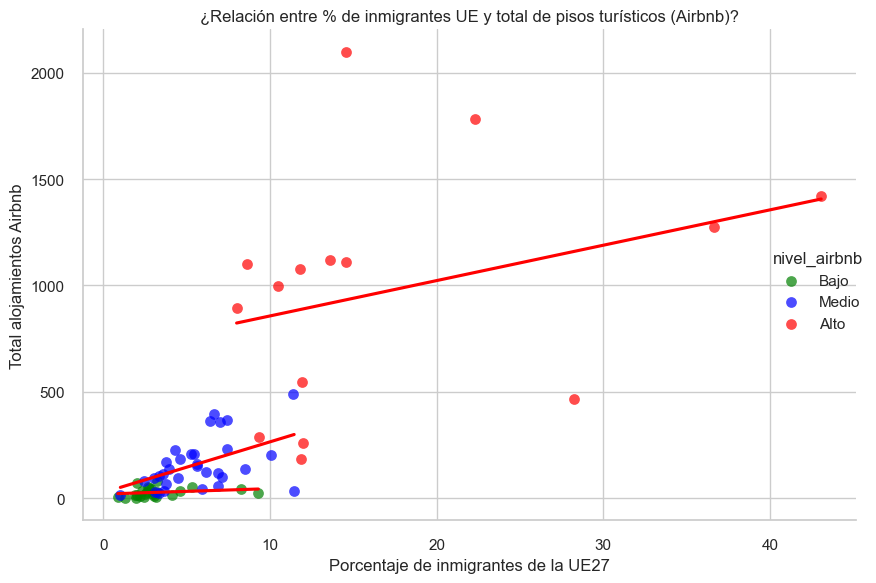

In [55]:
#3. ¿Existe una relación entre porcentaje de inmigrantes y aumento de pisos turísticos?

#Eje X = pct_inmigrantes_ue
#Eje Y = total_airbnb

sns.set(style="whitegrid")
sns.lmplot(
   data= df_filtrado,
   x='pct_inmigrantes_ue',
   y='total_airbnb',
   hue='nivel_airbnb',
   palette=colores_nivel_airbnb,
   height=6,
   aspect=1.3,
   scatter_kws={"s": 60, "alpha": 0.7},
   line_kws={"color": "red"},
   markers='o',
   ci=None 
)
plt.title('¿Relación entre % de inmigrantes UE y total de pisos turísticos (Airbnb)?')
plt.xlabel('Porcentaje de inmigrantes de la UE27')
plt.ylabel('Total alojamientos Airbnb')
plt.tight_layout()
plt.show()

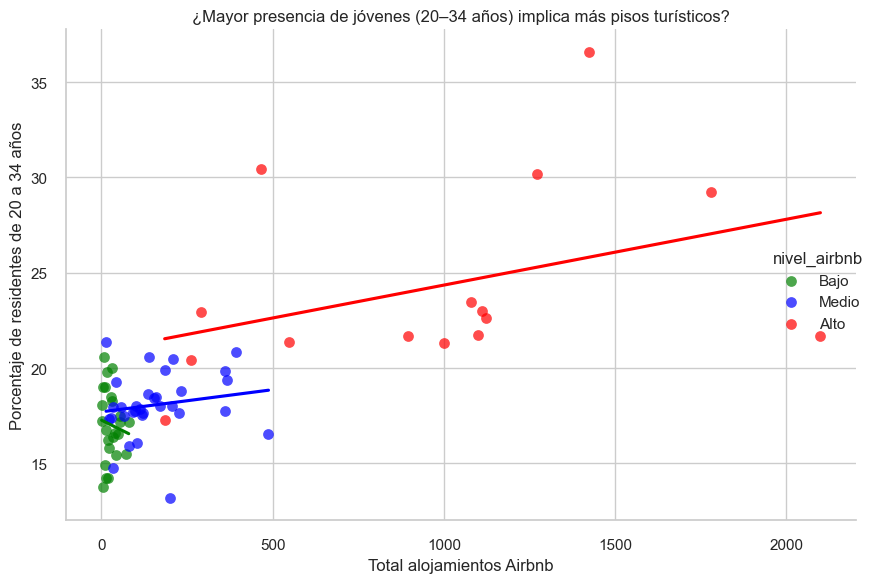

In [56]:
#4. ¿Los barrios con más jóvenes (20-34 años) concentran más pisos turísticos?

#Eje X = total_airbnb
#Eje Y = pct_residentes_20_34_años 

sns.lmplot(
    data=df_filtrado,
    x='total_airbnb',
    y='pct_residentes_20_34_años',
    hue='nivel_airbnb',
    palette=colores_nivel_airbnb,
    height=6,
    aspect=1.3,
    scatter_kws={"s": 60, "alpha": 0.7},
    ci=None
)
plt.title('¿Mayor presencia de jóvenes (20–34 años) implica más pisos turísticos?')
plt.xlabel('Total alojamientos Airbnb')
plt.ylabel('Porcentaje de residentes de 20 a 34 años')
plt.tight_layout()
plt.show()


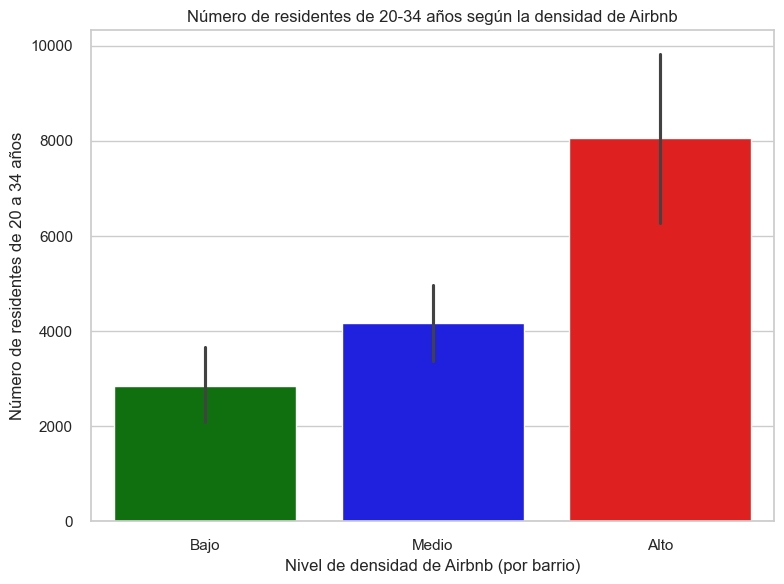

In [57]:
#5.¿La proporción de residentes jóvenes (20-34 años) disminuye en los barrios con alta concentración turística?

plt.figure(figsize=(8, 6))

sns.barplot(data=df_filtrado, x='nivel_airbnb', y='n_residentes_20_34_años', palette=colores_nivel_airbnb)

plt.title('Número de residentes de 20-34 años según la densidad de Airbnb')
plt.xlabel('Nivel de densidad de Airbnb (por barrio)')
plt.ylabel('Número de residentes de 20 a 34 años')

plt.tight_layout()
plt.show()

In [58]:
#buscando outlier
filt_a = df_filtrado['n_residentes_20_34_años'] > 8000
filt_b = df_filtrado['nivel_airbnb'] == 'Bajo'
filt = filt_a & filt_b
df_filtrado[filt]

cod_distrito nom_distrito  barrios_bcn  indice_ingresos_2017  \
codigo                                                                 
60                 9  Sant Andreu  Sant Andreu                  77.7   

        total_residentes  n_residentes_esp  pct_residentes_esp  \
codigo                                                           
60                 57961             52995            91.43217   

        n_residentes_no_ue  pct_residentes_no_ue  n_residentes_ue  \
codigo                                                              
60                    3748              6.466417            54079   

        pct_residentes_ue  n_inmigrantes_ue  pct_inmigrantes_ue  \
codigo                                                            
60              93.302393              1084            2.045476   

        n_residentes_20_34_años  pct_residentes_20_34_años  \
codigo                                                       
60                         8979                  15.491451   

        pct_var_esp_ residentes_1419  pct_var_no_ue_residentes_1419  \
codigo                                                                
60                          0.879447                      21.451717   

        pct_var_ue_residentes_1419  pct_var_ue_inmi_1419  \
codigo                                                     
60                        1.452021             40.414508   

        dif_residentes_esp_1419  total_airbnb  pct_airbnb_vecindario  \
codigo                                                                 
60                          462            72               0.352457   

        n_hab_ent  pct_hab_ent  pm_airbnb  pm_hab_ent  pct_var_airbnb1519  \
codigo                                                                      
60             21    29.166667     81.875  195.142857           35.849057   

        pct_var_hab_ent_1519  pct_var_pm_airbnb_1519  \
codigo                                                 
60                -27.586207               53.823999   

        pct_var_pm_airbnb_ent_1519  pct_var_pm_hab_ent_1519  pct_airbnb  \
codigo                                                                    
60                       177.13726                 8.555463    0.352457   

        dif_pm_airbnb_1519  dif_pm_hab_ent_1519  n_viv_vendidas  \
codigo                                                            
60               28.648585           124.729064             619   

        n_viv_nuevas_vendidas  pct_viv_nuevas_vendidas  prom_m2  \
codigo                                                            
60                         66                10.662359    72.55   

        prom_m2_nuevo  prom_m2_seg_mano  pm_viv_vendidas  \
codigo                                                     
60              82.55            71.325            251.4   

        pm_viv_vendidas_nuevas  pm_viv_vendidas_seg_mano   pm_m2  pm_m2_nuevo  \
codigo                                                                          
60                       334.6                     221.3  3320.8       4138.9   

        pm_m2_seg_mano  pct_var_viv_vendidas1419  \
codigo                                             
60              3025.0                102.826855   

        pct_var_viv_nuevas_vendidas1419  pct_var_viv_seg_mano_vendidas1419  \
codigo                                                                       
60                               4800.0                          86.170213   

        pct_var_pm_viv_vendidas1419  pct_var_pm_viv_nuevas_vendidas1419  \
codigo                                                                    
60                        86.498516                                 0.0   

        pct_var_pm_viv_seg_mano_vendidas1419  pm_m2_1419  \
codigo                                                     
60                                 64.169139   64.014422   

        pct_var_pm_m2_viv_nuevas_vendidas1419  \
codigo                                          
60                            

In [59]:
df_filtrado.columns

Index(['cod_distrito', 'nom_distrito', 'barrios_bcn', 'indice_ingresos_2017',
       'total_residentes', 'n_residentes_esp', 'pct_residentes_esp',
       'n_residentes_no_ue', 'pct_residentes_no_ue', 'n_residentes_ue',
       'pct_residentes_ue', 'n_inmigrantes_ue', 'pct_inmigrantes_ue',
       'n_residentes_20_34_años', 'pct_residentes_20_34_años',
       'pct_var_esp_ residentes_1419', 'pct_var_no_ue_residentes_1419',
       'pct_var_ue_residentes_1419', 'pct_var_ue_inmi_1419',
       'dif_residentes_esp_1419', 'total_airbnb', 'pct_airbnb_vecindario',
       'n_hab_ent', 'pct_hab_ent', 'pm_airbnb', 'pm_hab_ent',
       'pct_var_airbnb1519', 'pct_var_hab_ent_1519', 'pct_var_pm_airbnb_1519',
       'pct_var_pm_airbnb_ent_1519', 'pct_var_pm_hab_ent_1519', 'pct_airbnb',
       'dif_pm_airbnb_1519', 'dif_pm_hab_ent_1519', 'n_viv_vendidas',
       'n_viv_nuevas_vendidas', 'pct_viv_nuevas_vendidas', 'prom_m2',
       'prom_m2_nuevo', 'prom_m2_seg_mano', 'pm_viv_vendidas',
       'pm_viv_ven

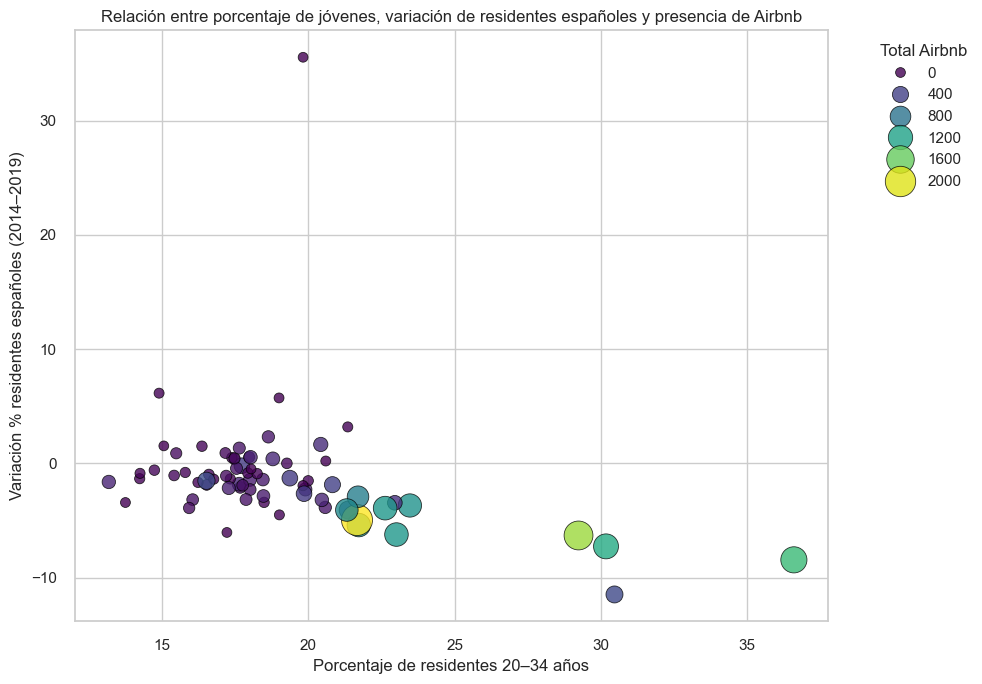

In [60]:
#6. ¿En qué medida el turismo (Airbnb) desplaza a jóvenes o los atrae (por oportunidades económicas)?
#Gráfico combinado o doble eje Y (opcional)
#x = pct_residentes_20_34_años, y1 = total_airbnb, y2 = pct_var_esp_residentes_1419

# Configurar estilo
sns.set(style="whitegrid")
# Crear el scatter plot combinado
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
   data=df_filtrado,
   x='pct_residentes_20_34_años',
   y='pct_var_esp_ residentes_1419',
   size='total_airbnb',
   hue='total_airbnb',
   palette='viridis',
   sizes=(50, 500),
   alpha=0.8,
   edgecolor='black'
)
# Títulos y etiquetas
plt.title('Relación entre porcentaje de jóvenes, variación de residentes españoles y presencia de Airbnb')
plt.xlabel('Porcentaje de residentes 20–34 años')
plt.ylabel('Variación % residentes españoles (2014–2019)')
# Leyenda
plt.legend(title='Total Airbnb', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [61]:
#INTERPRETACION: Los residentes jovenes si tienes mas presencia en barrios con mas airbnb, en cambio los residentes españoles presentan baja presencia en barrios con mayor airbnb

### 2.2.3 Transformacion demografica y gentrificacion

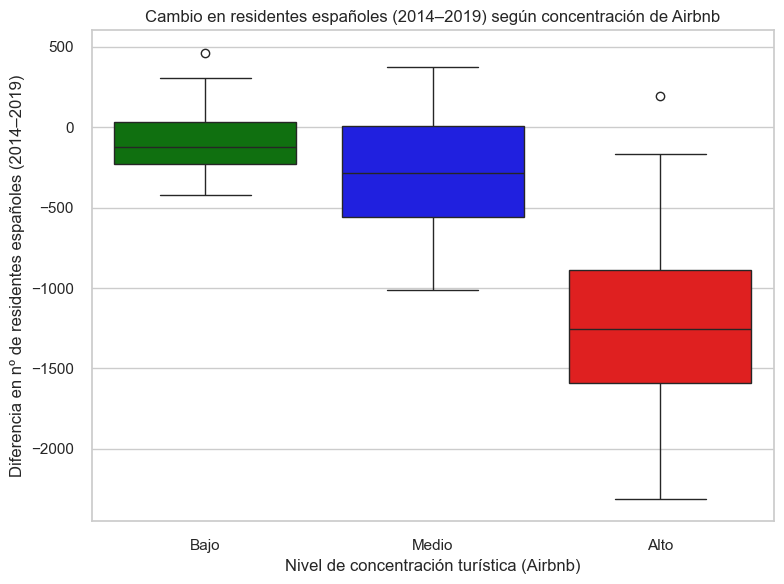

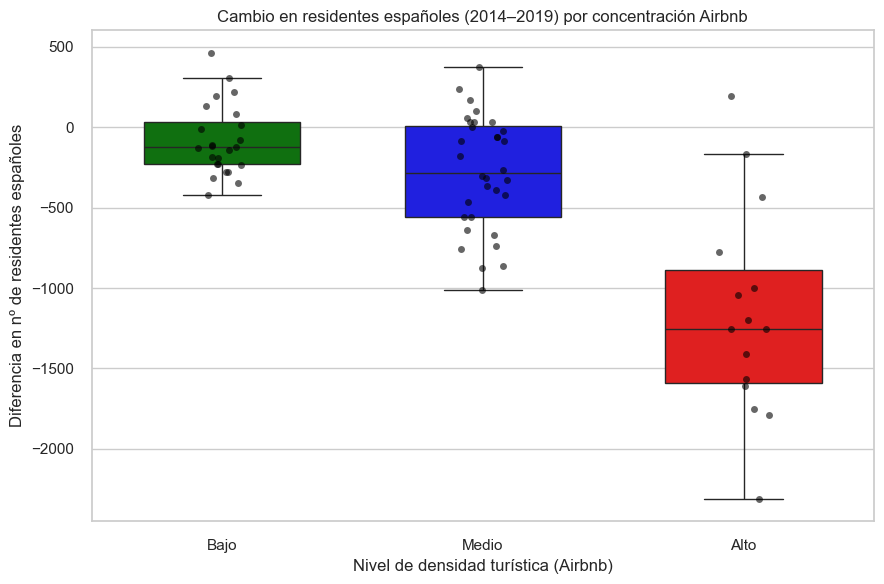

In [62]:
#7. ¿Hay una reducción significativa de residentes españoles en barrios con alta concentración Airbnb?
#Eje X = nivel_airbnb 
#Eje Y = dif_residentes_esp_1419

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(
   data=df_filtrado,
   x='nivel_airbnb',
   y='dif_residentes_esp_1419',
   palette=colores_nivel_airbnb
)
plt.title('Cambio en residentes españoles (2014–2019) según concentración de Airbnb')
plt.xlabel('Nivel de concentración turística (Airbnb)')
plt.ylabel('Diferencia en nº de residentes españoles (2014–2019)')
plt.tight_layout()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))

sns.boxplot(
   data=df_filtrado,
   x='nivel_airbnb',
   y='dif_residentes_esp_1419',
   palette=colores_nivel_airbnb,
   width=0.6,
   fliersize=0 
)
sns.stripplot(
   data=df_filtrado,
   x='nivel_airbnb',
   y='dif_residentes_esp_1419',
   color='black',
   size=5,
   jitter=True,
   alpha=0.6
)
plt.title('Cambio en residentes españoles (2014–2019) por concentración Airbnb')
plt.xlabel('Nivel de densidad turística (Airbnb)')
plt.ylabel('Diferencia en nº de residentes españoles')
plt.tight_layout()
plt.show()

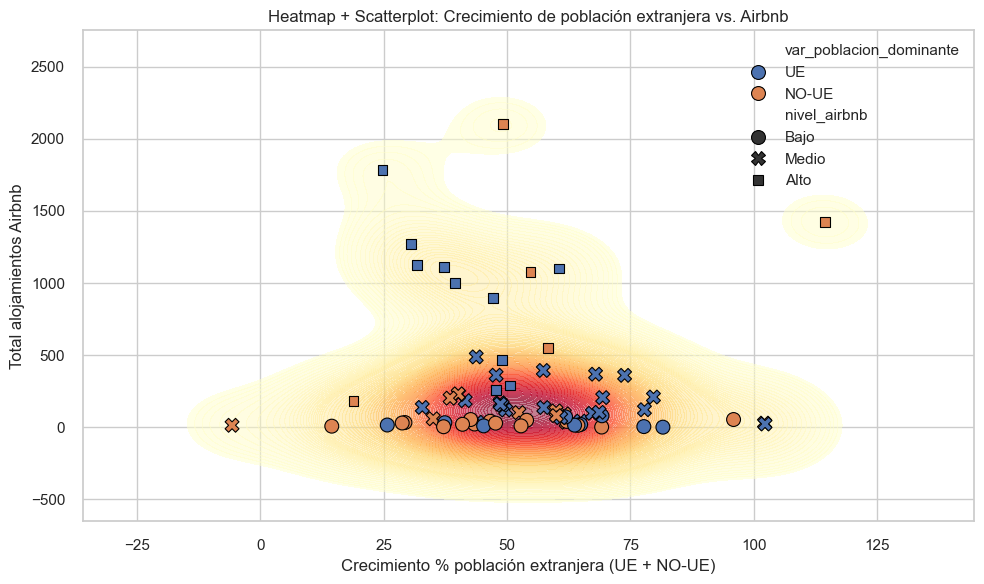

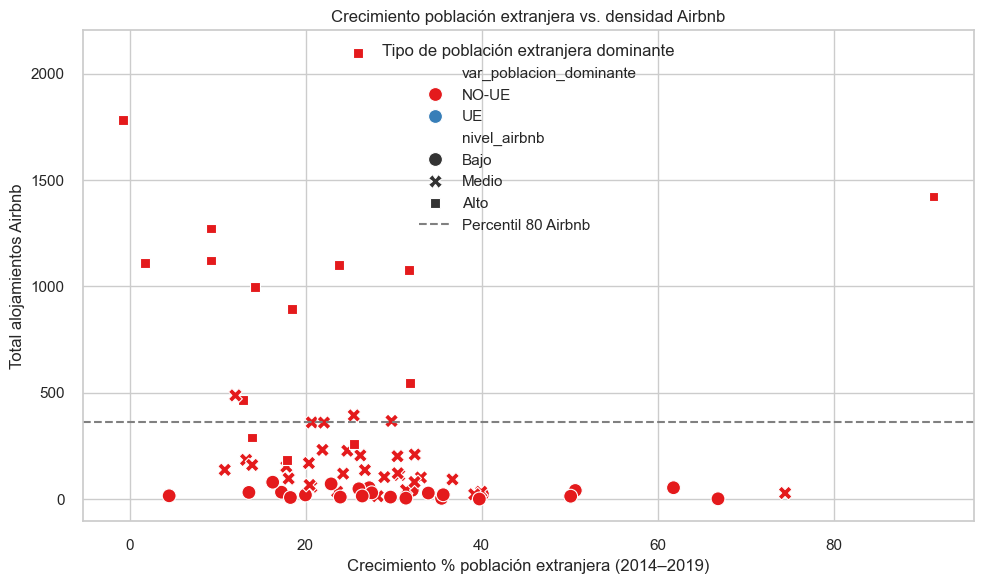

In [63]:
#¿Dónde ha crecido más la población extranjera y coincide con zonas de mayor densidad de Airbnb?

# Crear columna combinada
df_filtrado['var_total_extranjera'] = df_filtrado['pct_var_ue_inmi_1419'] + df_filtrado['pct_var_no_ue_residentes_1419']
df_filtrado['var_poblacion_dominante'] = df_filtrado.apply(
   lambda row: 'UE' if row['pct_var_ue_inmi_1419'] > row['pct_var_no_ue_residentes_1419'] else 'NO-UE',
   axis=1
)
plt.figure(figsize=(10, 6))
#Heatmap
sns.kdeplot(
   data=df_filtrado,
   x='var_total_extranjera',
   y='total_airbnb',
   fill=True,
   cmap='YlOrRd',
   alpha=0.5,
   levels=100,
   thresh=0.05
)
# Scatterplot
sns.scatterplot(
   data=df_filtrado,
   x='var_total_extranjera',
   y='total_airbnb',
   hue='var_poblacion_dominante',
   style='nivel_airbnb',
   s=100,
   edgecolor='black'
)
plt.title('Heatmap + Scatterplot: Crecimiento de población extranjera vs. Airbnb')
plt.xlabel('Crecimiento % población extranjera (UE + NO-UE)')
plt.ylabel('Total alojamientos Airbnb')
plt.tight_layout()
plt.show()

#Scatterplot
# Calcular el crecimiento total de población extranjera (UE + NO-UE)
df_filtrado['var_total_extranjera'] = df_filtrado['pct_var_ue_residentes_1419'] + df_filtrado['pct_var_no_ue_residentes_1419']
# Determinar qué grupo tuvo mayor crecimiento: UE o NO-UE
df_filtrado['var_poblacion_dominante'] = df_filtrado.apply(
   lambda row: 'UE' if row['pct_var_ue_residentes_1419'] > row['pct_var_no_ue_residentes_1419'] else 'NO-UE',
   axis=1
)
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
   data=df_filtrado,
   x='var_total_extranjera',
   y='total_airbnb',
   hue='var_poblacion_dominante',
   style='nivel_airbnb',
   palette='Set1',
   s=100
)
plt.title('Crecimiento población extranjera vs. densidad Airbnb')
plt.xlabel('Crecimiento % población extranjera (2014–2019)')
plt.ylabel('Total alojamientos Airbnb')
plt.axhline(df_filtrado['total_airbnb'].quantile(0.8), color='grey', linestyle='--', label='Percentil 80 Airbnb')
plt.legend(title='Tipo de población extranjera dominante')
plt.tight_layout()
plt.show()


## 2.3 Transformacion socioeconomica

### 2.3.1 RFD (Renta Familiar Disponible) vs Densidad Airbnb

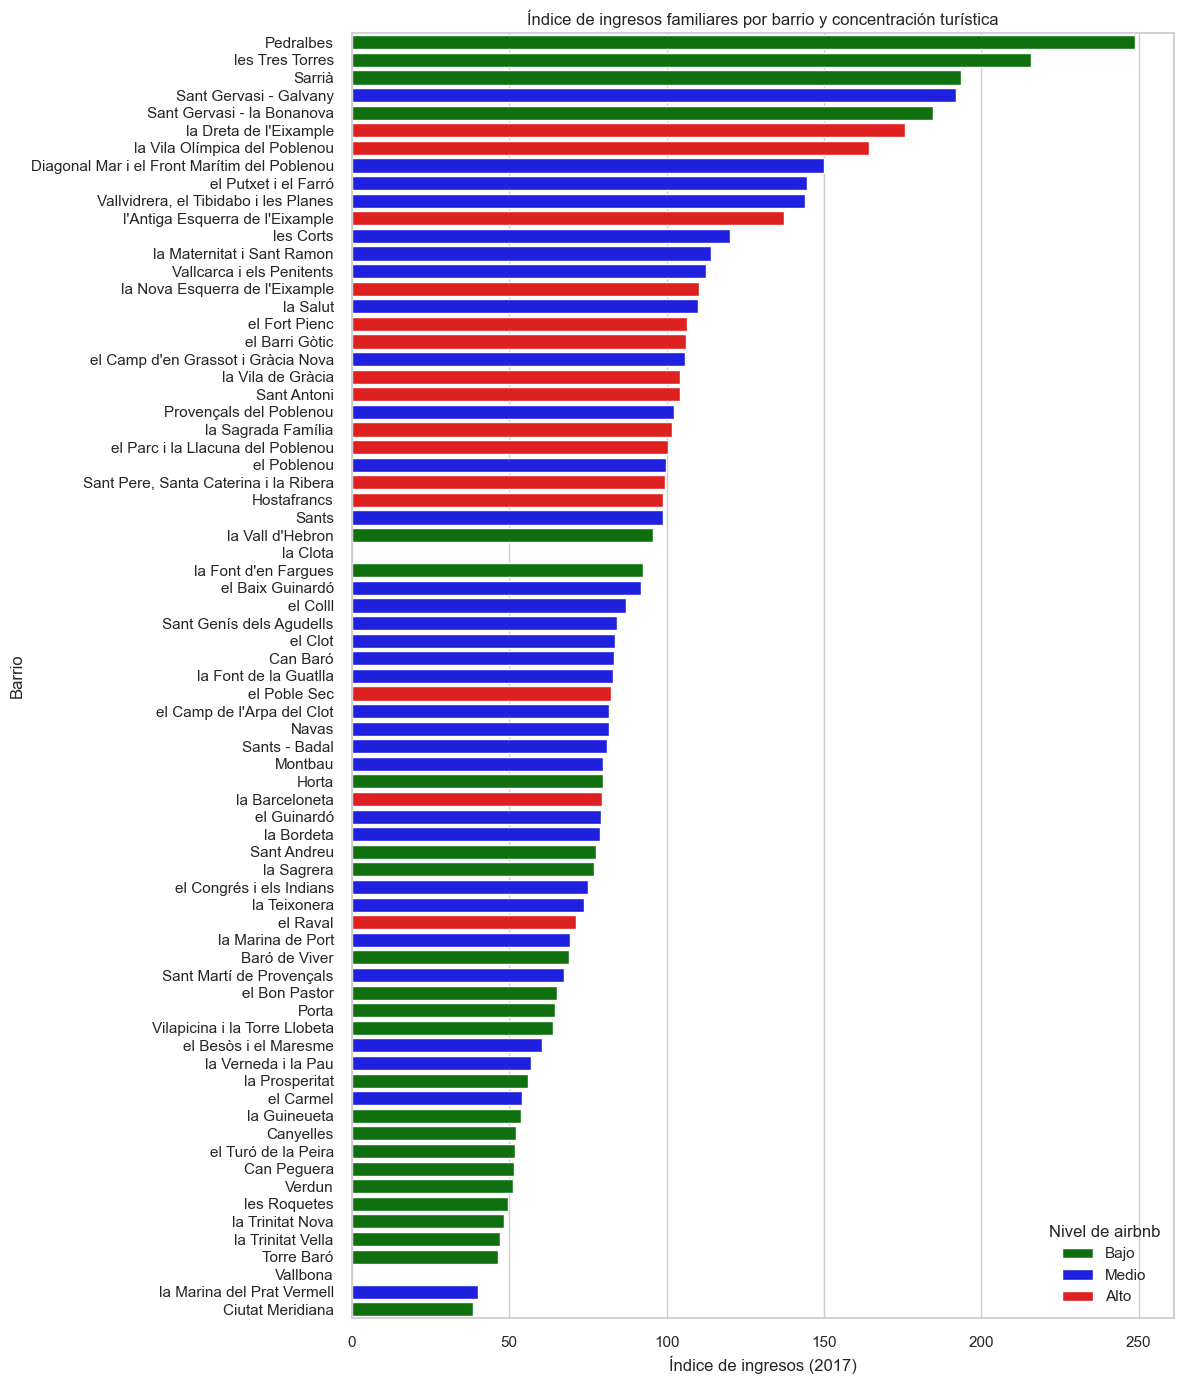

In [64]:
#1. Barplot horizontal con agrupacion por categoria:
#El gráfico muestra el índice de ingresos familiares (2017) por barrio, clasificado por niveles de concentración 
#airbnb (Alta, Media, Baja).

cols_socioeco = [
    'barrios_bcn', 'indice_ingresos_2017', 'nivel_airbnb'
]
df_filtrado1= df_filtrado[cols_socioeco].copy()

df_filtrado_sorted = df_filtrado1.sort_values('indice_ingresos_2017', ascending=False)

plt.figure(figsize=(12, 14))
sns.barplot(
    data=df_filtrado_sorted,
    x='indice_ingresos_2017',
    y='barrios_bcn',
    hue='nivel_airbnb',
    palette=colores_nivel_airbnb,
    dodge=False
)
plt.title('Índice de ingresos familiares por barrio y concentración turística')
plt.xlabel('Índice de ingresos (2017)')
plt.ylabel('Barrio')
plt.legend(title='Nivel de airbnb')
plt.tight_layout()
plt.savefig("rfd_airbnb.png", dpi=300)  
plt.show()


In [65]:
filt = df_filtrado['barrios_bcn'].isin(['Pedralbes', 'les Tres Torres'])
df_filtrado[filt]

cod_distrito         nom_distrito      barrios_bcn  \
codigo                                                       
21                 4            Les Corts        Pedralbes   
24                 5  Sarria-Sant Gervasi  les Tres Torres   

        indice_ingresos_2017  total_residentes  n_residentes_esp  \
codigo                                                             
21                     248.8             12000              9812   
24                     215.8             16671             14962   

        pct_residentes_esp  n_residentes_no_ue  pct_residentes_no_ue  \
codigo                                                                 
21               81.766667                1174              9.783333   
24               89.748665                 838              5.026693   

        n_residentes_ue  pct_residentes_ue  n_inmigrantes_ue  \
codigo                                                         
21                10725          89.375000               913   
24                15652          93.887589               690   

        pct_inmigrantes_ue  n_residentes_20_34_años  \
codigo                                                
21                9.304933                     1896   
24                4.611683                     2729   

        pct_residentes_20_34_años  pct_var_esp_ residentes_1419  \
codigo                                                            
21                      15.800000                     -0.798706   
24                      16.369744                      1.499220   

        pct_var_no_ue_residentes_1419  pct_var_ue_residentes_1419  \
codigo                                                              
21                          40.598802                   -0.500974   
24                          15.268226                    1.994005   

        pct_var_ue_inmi_1419  dif_residentes_esp_1419  total_airbnb  \
codigo                                                                
21                  2.815315                      -79            23   
24                 14.049587                      221            33   

        pct_airbnb_vecindario  n_hab_ent  pct_hab_ent   pm_airbnb  pm_hab_ent  \
codigo                                                                          
21                   0.112591          6    26.086957   83.086957  162.166667   
24                   0.161543         19    57.575758  154.727273  184.789474   

        pct_var_airbnb1519  pct_var_hab_ent_1519  pct_var_pm_airbnb_1519  \
codigo                                                                     
21               43.750000            -45.454545                6.692721   
24               43.478261             11.764706               78.382319   

        pct_var_pm_airbnb_ent_1519  pct_var_pm_hab_ent_1519  pct_airbnb  \
codigo                                                                    
21                       80.732861                 6.518283    0.112591   
24                       85.882903                26.355612    0.161543   

        dif_pm_airbnb_1519  dif_pm_hab_ent_1519  n_viv_vendidas  \
codigo                                                            
21                5.211957            72.439394              90   
24               67.988142            85.377709              95   

        n_viv_nuevas_vendidas  pct_viv_nuevas_vendidas  prom_m2  \
codigo                                                            
21                          9                10.000000  143.700   
24                          2                 2.105263  139.725   

        prom_m2_nuevo  prom_m2_seg_mano  pm_viv_vendidas  \
codigo                                                     
21              184.8           135.800           1125.3   
24                0.0           139.925            804.4   

        pm_viv_vendidas_nuevas  pm_viv_vendidas_seg_mano   pm_m2  pm_m2_nuevo  \
codigo                                                                          
21              

In [66]:
df_filtrado['total_airbnb'].describe()

count      73.000000
mean      279.835616
std       443.819033
min         0.000000
25%        29.000000
50%        97.000000
75%       261.000000
max      2099.000000
Name: total_airbnb, dtype: float64

In [67]:
df_filtrado['total_airbnb'].quantile(0.30)

34.199999999999996

<Axes: xlabel='total_airbnb', ylabel='Count'>

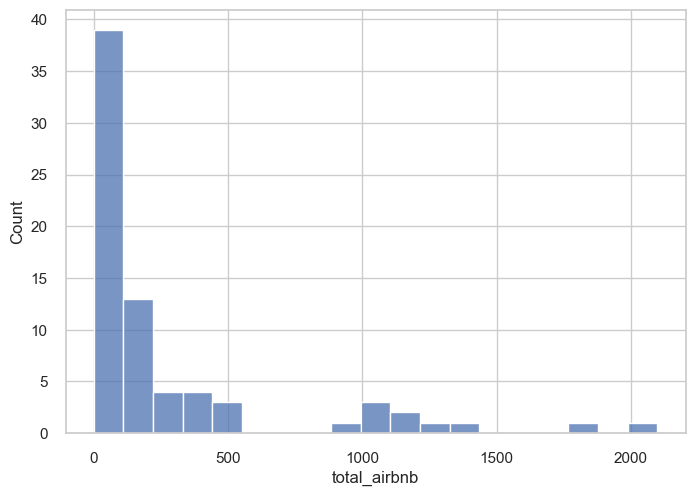

In [68]:
sns.histplot(df_filtrado, x='total_airbnb')

### 2.3.2 Servicios turisticos vs Densidad Airbnb

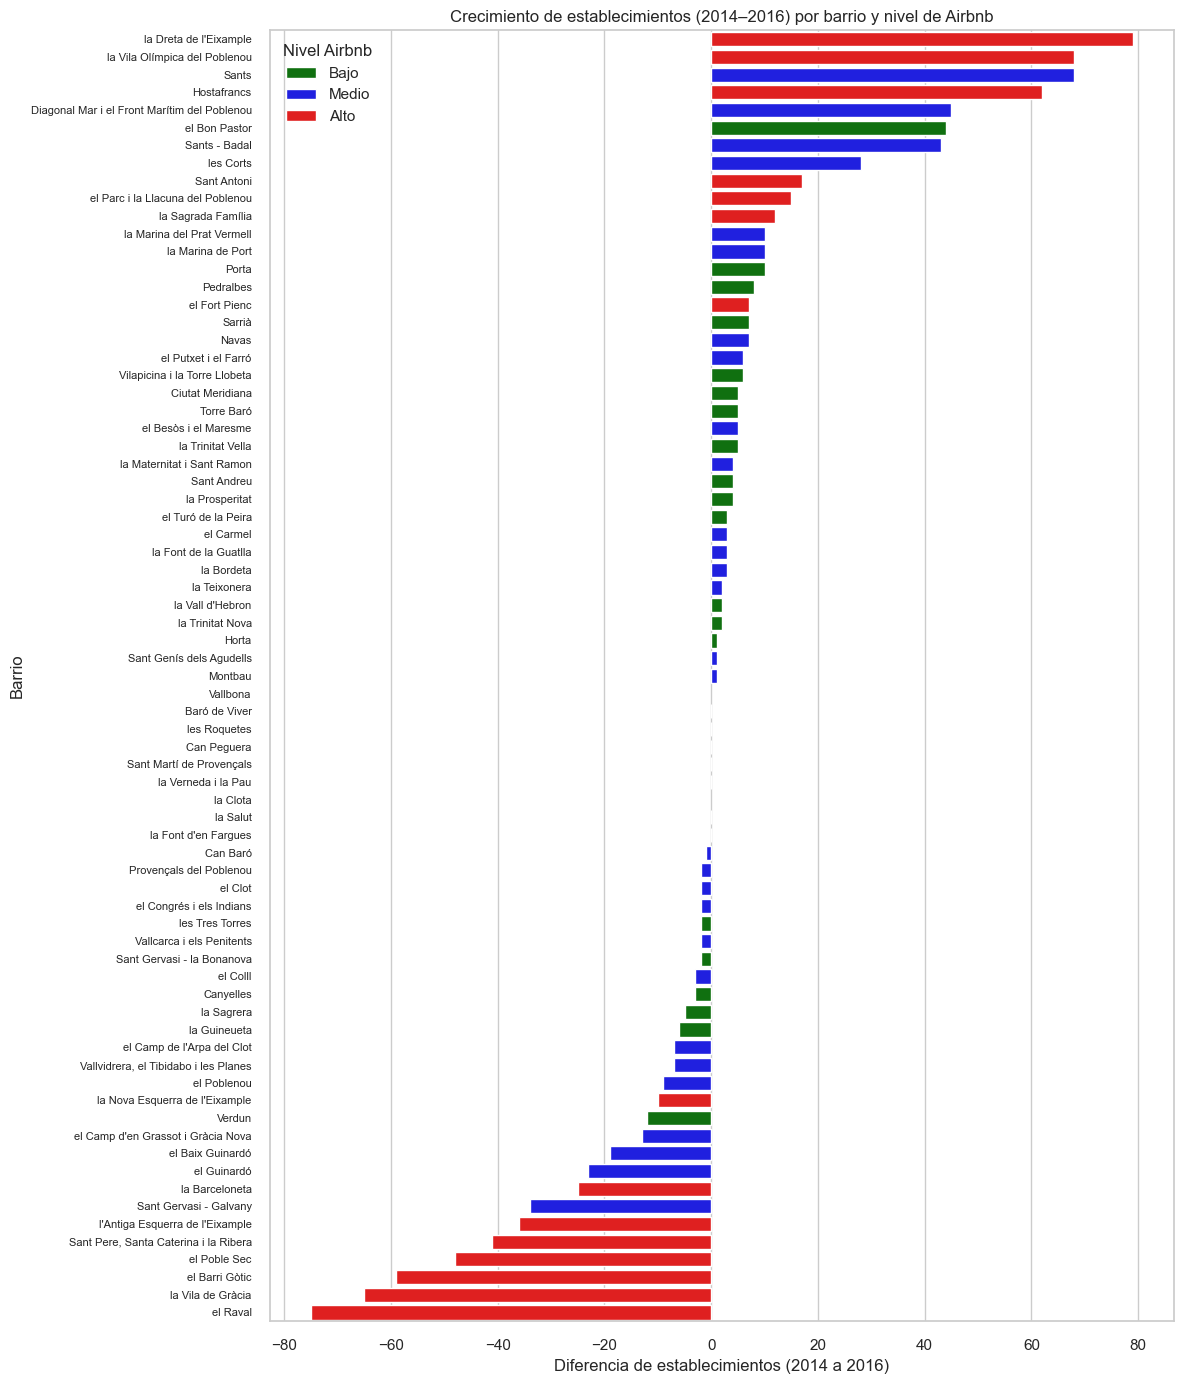

In [69]:
#2. Crecimiento de establecimientos (2014–2016) por barrio y nivel de Airbnb

feature = 'diferencia_n_est_14_16'

#cols = ['barrios_bcn', 'diferencia_n_est_14_16', 'nivel_airbnb']
cols = ['barrios_bcn', feature, 'nivel_airbnb']
df_filtrado2 = df_filtrado[cols].copy()
df_filtrado_sorted = df_filtrado2.sort_values(feature, ascending=False)

plt.figure(figsize=(12, 14))
sns.barplot(
    data=df_filtrado_sorted,
    x=feature,
    y='barrios_bcn',
    hue='nivel_airbnb',
    palette=colores_nivel_airbnb,
    dodge=False
)
plt.title('Crecimiento de establecimientos (2014–2016) por barrio y nivel de Airbnb')
plt.xlabel('Diferencia de establecimientos (2014 a 2016)')
plt.ylabel('Barrio')
plt.tick_params(axis='y', labelsize=8)
plt.legend(title='Nivel Airbnb')
plt.tight_layout()
plt.savefig("establecimientos_aribnb.png", dpi=300)
plt.show()


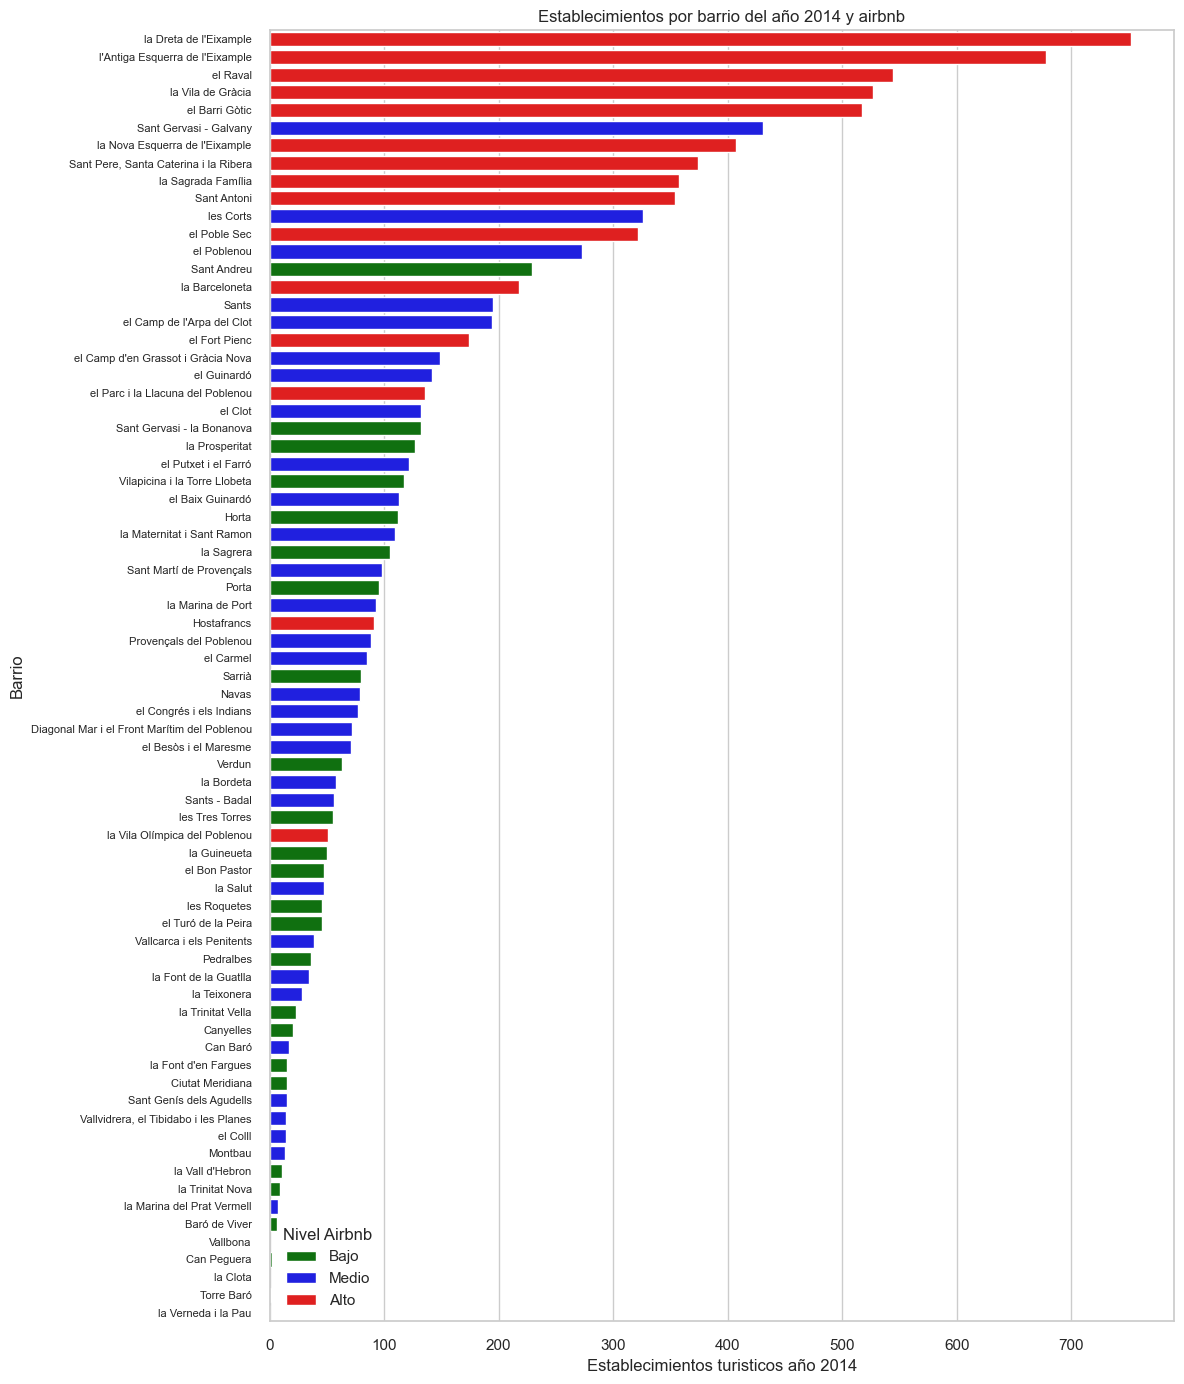

<Figure size 800x550 with 0 Axes>

In [70]:
#2. GRAFICO 3- Crecimiento de establecimientos del año 2014 y nivel de Airbnb

feature = 'n_establecimientos_2014'
cols = ['barrios_bcn', feature, 'nivel_airbnb']
df_filtrado2 = df_filtrado[cols].copy()
df_filtrado_sorted = df_filtrado2.sort_values(feature, ascending=False)

plt.figure(figsize=(12, 14))
sns.barplot(
    data=df_filtrado_sorted,
    x=feature,
    y='barrios_bcn',
    hue='nivel_airbnb',
    palette=colores_nivel_airbnb,
    dodge=False
)
plt.title('Establecimientos por barrio del año 2014 y airbnb')
plt.xlabel('Establecimientos turisticos año 2014')
plt.ylabel('Barrio')
plt.tick_params(axis='y', labelsize=8)
plt.legend(title='Nivel Airbnb')
plt.tight_layout()
plt.show()
# Ejemplo de salvar Imagen
plt.savefig("ejemplo_imagen.jpg")

### 2.3.3 Correlacion RFD vs Mercado Inmobiliario

In [71]:
#3. Analisis de correlacion: 

variables = [
    'total_airbnb',      # Total anuncios Airbnb
    'n_hab_ent',         # Pisos turísticos enteros
    'indice_ingresos_2017',  # Índice de ingresos
    'pm_viv_vendidas',   # Precio medio vivienda vendida
    'pm_alq19',          # Precio medio alquiler 2019
    'pm_airbnb',         # Precio medio de Airbnb
    'pm_hab_ent'         # Precio medio piso entero Airbnb
]

correlaciones = df_filtrado[variables].corr()
print(correlaciones)

                      total_airbnb  n_hab_ent  indice_ingresos_2017  \
total_airbnb              1.000000   0.982295              0.221621   
n_hab_ent                 0.982295   1.000000              0.257580   
indice_ingresos_2017      0.221621   0.257580              1.000000   
pm_viv_vendidas           0.172535   0.195664              0.917576   
pm_alq19                  0.295704   0.301423              0.828998   
pm_airbnb                 0.244463   0.280101              0.319613   
pm_hab_ent                0.063484   0.084838              0.180739   

                      pm_viv_vendidas  pm_alq19  pm_airbnb  pm_hab_ent  
total_airbnb                 0.172535  0.295704   0.244463    0.063484  
n_hab_ent                    0.195664  0.301423   0.280101    0.084838  
indice_ingresos_2017         0.917576  0.828998   0.319613    0.180739  
pm_viv_vendidas              1.000000  0.771733   0.273064    0.149587  
pm_alq19                     0.771733  1.000000   0.196808    0.05

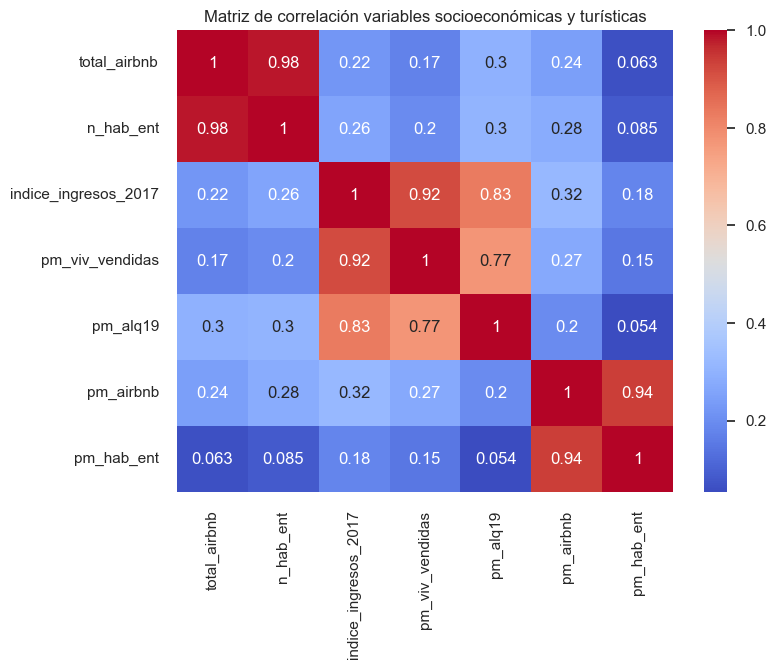

In [72]:
#Matriz de correlacion

plt.figure(figsize=(8,6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación variables socioeconómicas y turísticas')
plt.savefig("coorelacion.png", dpi=300)
plt.show()

In [73]:
#df_filtrado.rename(columns={'pct_var_esp_ residentes_1419': 'pct_var_esp_residentes_1419'}, inplace=True)

# 3. Modelo Random Forest

In [74]:
df_filtrado.columns

Index(['cod_distrito', 'nom_distrito', 'barrios_bcn', 'indice_ingresos_2017',
       'total_residentes', 'n_residentes_esp', 'pct_residentes_esp',
       'n_residentes_no_ue', 'pct_residentes_no_ue', 'n_residentes_ue',
       'pct_residentes_ue', 'n_inmigrantes_ue', 'pct_inmigrantes_ue',
       'n_residentes_20_34_años', 'pct_residentes_20_34_años',
       'pct_var_esp_ residentes_1419', 'pct_var_no_ue_residentes_1419',
       'pct_var_ue_residentes_1419', 'pct_var_ue_inmi_1419',
       'dif_residentes_esp_1419', 'total_airbnb', 'pct_airbnb_vecindario',
       'n_hab_ent', 'pct_hab_ent', 'pm_airbnb', 'pm_hab_ent',
       'pct_var_airbnb1519', 'pct_var_hab_ent_1519', 'pct_var_pm_airbnb_1519',
       'pct_var_pm_airbnb_ent_1519', 'pct_var_pm_hab_ent_1519', 'pct_airbnb',
       'dif_pm_airbnb_1519', 'dif_pm_hab_ent_1519', 'n_viv_vendidas',
       'n_viv_nuevas_vendidas', 'pct_viv_nuevas_vendidas', 'prom_m2',
       'prom_m2_nuevo', 'prom_m2_seg_mano', 'pm_viv_vendidas',
       'pm_viv_ven

In [75]:
df = df_filtrado[columnas_deseadas].copy()

df['densidad_airbnb'] = df['total_airbnb'] / df['total_residentes']

df['nivel_airbnb'] = pd.cut(
    df['densidad_airbnb'], 
    bins=[
        df['densidad_airbnb'].quantile(0),
        df['densidad_airbnb'].quantile(0.35),
        df['densidad_airbnb'].quantile(0.80),
        df['densidad_airbnb'].quantile(1.0)
    ], 
    labels=['Bajo', 'Medio', 'Alto']
)


In [76]:
model = RandomForestRegressor()

## Hipotesis 

In [77]:
# Agrupar datos por distrito y calcular media, desviación estándar y conteo para la variable 'pm_alq19' (precio medio alquiler 2019)
grouped = df.groupby('nom_distrito')['pm_alq19'].agg(['mean', 'std', 'count']).reset_index()

# Calculamos el coeficiente de variación (CV = desviación estándar / media)
grouped['cv'] = grouped['std'] / grouped['mean']

# Mostramos los resultados
print("Average Renting Prices and Variation by District in 2019:\n")
print(grouped[['nom_distrito', 'mean', 'std', 'cv']].to_string(index=False, float_format='%.2f'))

print("\nCV (Coefficient of Variation) close to 0 indicates low variation within the district.")

#"La variación observada nos permite asumir que los precios promedio de alquiler no son muy diferentes entre sí. 
#Dentro de cada distrito, la variación es baja."

Average Renting Prices and Variation by District in 2019:

       nom_distrito    mean    std   cv
       Ciutat Vella  960.82 107.51 0.11
             Gracia  936.34  74.27 0.08
      Horta-Guinado  728.06 247.95 0.34
         L'Eixample 1103.78 143.55 0.13
          Les Corts 1368.10 505.32 0.37
         Nou Barris  524.78 306.19 0.58
        Sant Andreu  646.69 304.03 0.47
         Sant Marti  982.90 225.52 0.23
     Sants-Montjüic  747.20 303.77 0.41
Sarria-Sant Gervasi 1369.88 179.40 0.13

CV (Coefficient of Variation) close to 0 indicates low variation within the district.


## Exploracion de datos


In [78]:
df.columns

Index(['cod_distrito', 'nom_distrito', 'barrios_bcn', 'indice_ingresos_2017',
       'total_residentes', 'n_residentes_esp', 'pct_residentes_esp',
       'n_residentes_no_ue', 'pct_residentes_no_ue', 'n_residentes_ue',
       'pct_residentes_ue', 'n_inmigrantes_ue', 'pct_inmigrantes_ue',
       'n_residentes_20_34_años', 'pct_residentes_20_34_años',
       'pct_var_esp_ residentes_1419', 'pct_var_no_ue_residentes_1419',
       'pct_var_ue_residentes_1419', 'pct_var_ue_inmi_1419',
       'dif_residentes_esp_1419', 'total_airbnb', 'pct_airbnb_vecindario',
       'n_hab_ent', 'pct_hab_ent', 'pm_airbnb', 'pm_hab_ent',
       'pct_var_airbnb1519', 'pct_var_hab_ent_1519', 'pct_var_pm_airbnb_1519',
       'pct_var_pm_airbnb_ent_1519', 'pct_var_pm_hab_ent_1519', 'pct_airbnb',
       'dif_pm_airbnb_1519', 'dif_pm_hab_ent_1519', 'n_viv_vendidas',
       'n_viv_nuevas_vendidas', 'pct_viv_nuevas_vendidas', 'prom_m2',
       'prom_m2_nuevo', 'prom_m2_seg_mano', 'pm_viv_vendidas',
       'pm_viv_ven

# 3.1 Random Forest con  variables turísticas, demográficas y socioeconómicas

In [79]:
# Asegurar que 'codigo' sea una columna
if 'codigo' not in df.columns:
    df = df.reset_index()

# División personalizada: 2 barrios por distrito para test
def split_custom_test_set(df_: pd.DataFrame, test_size=2):
    test_set = (
        df_
        .groupby('nom_distrito', group_keys=False)
        .apply(lambda x: x.sample(n=test_size, random_state=42))
        .reset_index(drop=True)
        .set_index('codigo')
    )
    train_set = df_.set_index('codigo').drop(test_set.index)
    return train_set.reset_index(), test_set.reset_index()

train_set, test_set = split_custom_test_set(df)

##  Preprocesamiento de datos

In [80]:
# Preprocesamiento: separar columnas numéricas y categóricas
target = 'pm_alq19'
exclude = ['codigo', 'nom_distrito', 'nom_barri', target]

def get_feature_columns(df, exclude):
    num_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.difference(exclude)
    return list(num_cols), list(cat_cols)

num_cols, cat_cols = get_feature_columns(train_set, exclude)

In [81]:
# Imputación de valores
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train_num = num_imputer.fit_transform(train_set[num_cols])
X_test_num = num_imputer.transform(test_set[num_cols])

X_train_cat = cat_imputer.fit_transform(train_set[cat_cols])
X_test_cat = cat_imputer.transform(test_set[cat_cols])

# Codificación OneHot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

# Combinar features numéricas y categóricas codificadas
X_train = np.hstack([X_train_num, X_train_cat_enc])
X_test = np.hstack([X_test_num, X_test_cat_enc])
y_train = train_set[target].values
y_test = test_set[target].values

# Nombres de todas las variables
feature_names = num_cols + list(encoder.get_feature_names_out(cat_cols))

##  Configuracion de modelo

In [82]:
# Entrenar modelo base y obtener variables importantes
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# Ordenar variables por importancia
indices_total = np.argsort(importances)[::-1]
feature_names_sorted = [feature_names[i] for i in indices_total]


 ## Entrenamiento de Modelo

Resultados para distintos N features:

Top 5 variables:
R²: 0.913 | RMSE: 105.82
 Importancia de variables en este modelo:
- n_residentes_esp: 32.623%
- pm_alq_14: 20.129%
- pm_m2_viv_alq19: 19.457%
- indice_ingresos_2017: 15.791%
- pm_viv_vendidas_seg_mano: 12.000%
------------------------------------------------------------


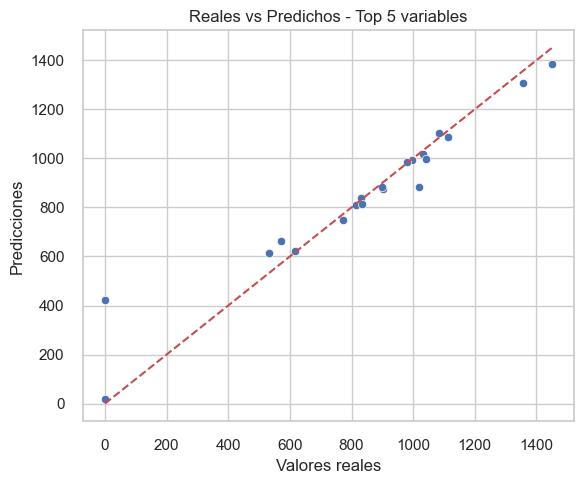

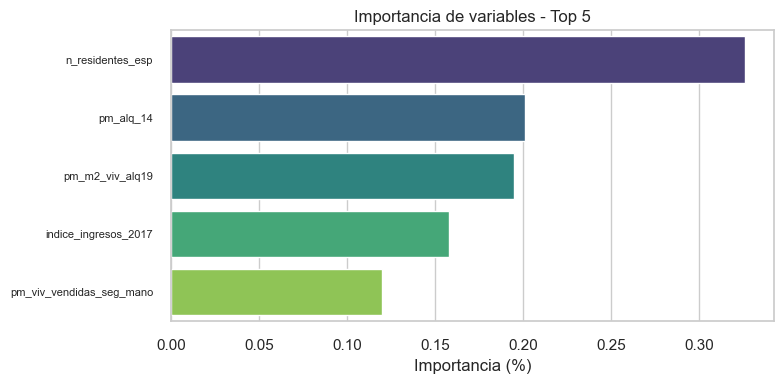

Top 10 variables:
R²: 0.950 | RMSE: 79.69
 Importancia de variables en este modelo:
- pm_m2_viv_alq19: 18.948%
- pm_alq_14: 14.465%
- indice_ingresos_2017: 13.892%
- total_residentes: 9.722%
- n_residentes_esp: 9.635%
- pm_viv_vendidas_seg_mano: 9.601%
- pm_m2_alq19: 8.178%
- dif_pm_alq1419: 6.318%
- n_viv_vendidas: 4.678%
- n_residentes_ue: 4.562%
------------------------------------------------------------


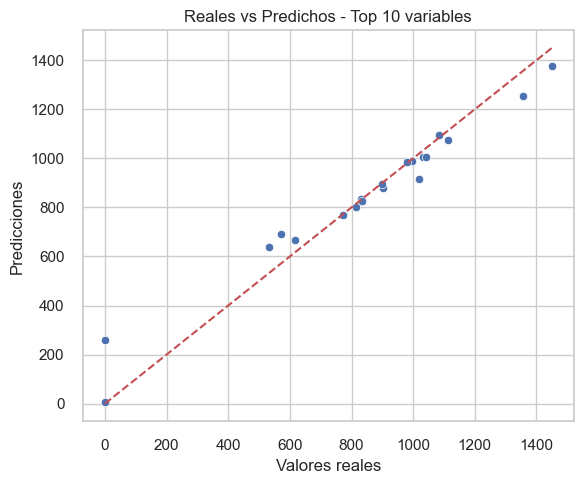

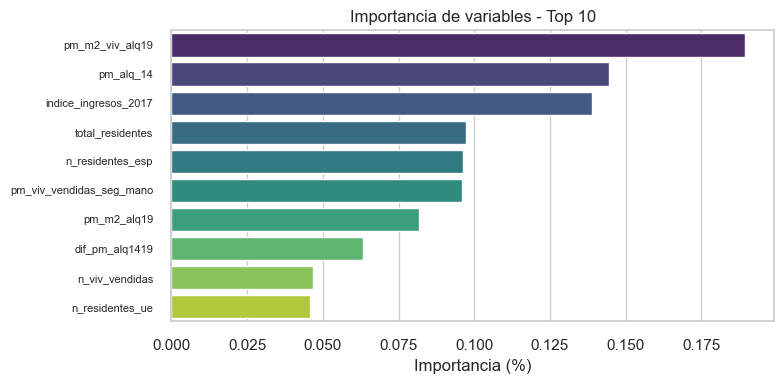

Top 15 variables:
R²: 0.899 | RMSE: 113.99
 Importancia de variables en este modelo:
- pm_alq_14: 15.617%
- pm_m2_viv_alq19: 14.533%
- indice_ingresos_2017: 12.678%
- total_residentes: 8.369%
- dif_pm_alq1419: 8.052%
- pm_viv_vendidas_seg_mano: 7.104%
- n_residentes_esp: 5.792%
- n_viv_vendidas: 4.480%
- pm_m2_seg_mano: 4.098%
- n_residentes_20_34_años: 4.083%
- pm_m2_alq19: 3.891%
- n_inmigrantes_ue: 3.607%
- prom_m2: 3.486%
- n_residentes_ue: 2.138%
- pm_m2: 2.073%
------------------------------------------------------------


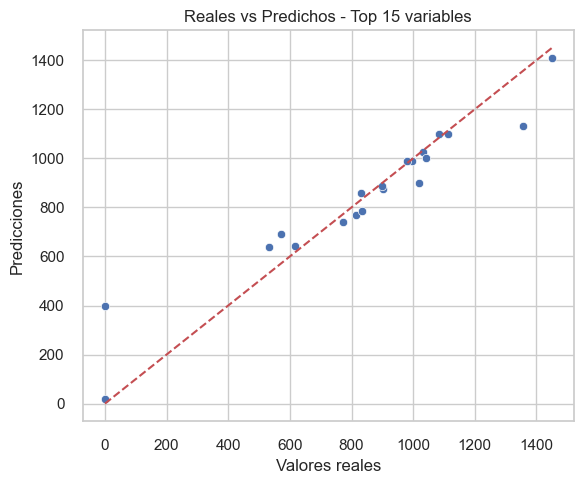

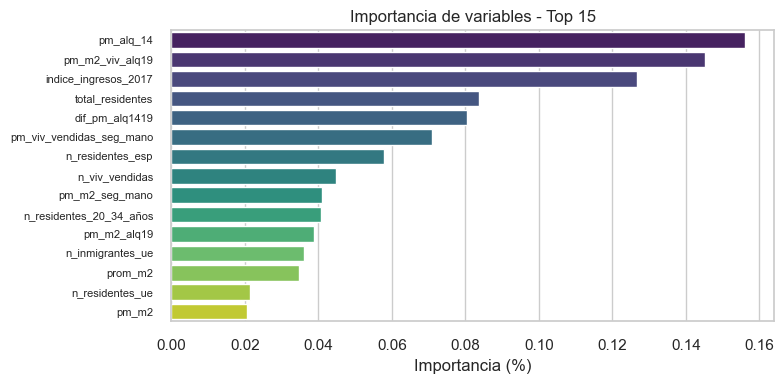

Top 20 variables:
R²: 0.909 | RMSE: 107.93
 Importancia de variables en este modelo:
- pm_m2_viv_alq19: 15.186%
- pm_alq_14: 12.062%
- indice_ingresos_2017: 9.900%
- n_residentes_20_34_años: 8.602%
- pm_m2_alq19: 6.725%
- total_residentes: 4.756%
- prom_m2: 4.510%
- pm_viv_vendidas: 4.123%
- n_viv_vendidas: 3.779%
- dif_pm_alq1419: 3.544%
- pct_airbnb_vecindario: 3.476%
- n_residentes_ue: 3.422%
- pm_viv_vendidas_seg_mano: 3.173%
- n_residentes_esp: 3.168%
- pm_m2_seg_mano: 3.008%
- n_inmigrantes_ue: 2.896%
- prom_m2_seg_mano: 2.382%
- m_m2_viv_alq14: 2.360%
- pm_m2: 1.908%
- pm_airbnb: 1.019%
------------------------------------------------------------


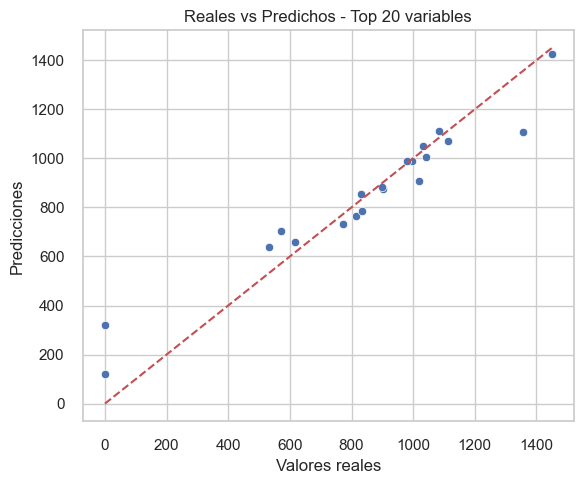

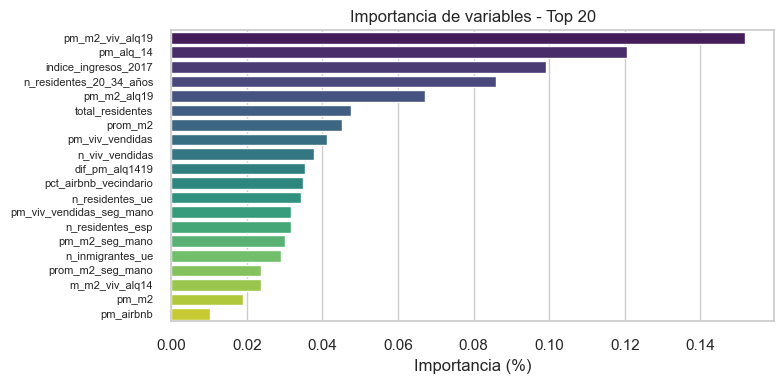

Top 30 variables:
R²: 0.917 | RMSE: 102.99
 Importancia de variables en este modelo:
- pm_m2_viv_alq19: 12.903%
- pm_alq_14: 11.695%
- indice_ingresos_2017: 8.330%
- n_residentes_20_34_años: 5.910%
- pm_m2_alq19: 5.591%
- n_residentes_esp: 5.452%
- n_residentes_ue: 4.638%
- total_residentes: 4.601%
- pm_viv_vendidas_seg_mano: 3.841%
- dif_pm_alq1419: 3.593%
- pm_viv_vendidas: 3.379%
- pm_m2_seg_mano: 3.163%
- n_viv_vendidas: 3.079%
- prom_m2: 3.071%
- m_m2_viv_alq14: 2.668%
- n_viv_alq: 2.275%
- total_airbnb: 2.057%
- pct_var_viv_vendidas1419: 1.967%
- pct_airbnb_vecindario: 1.582%
- prom_m2_seg_mano: 1.548%
- pct_var_pm_alq_m21419: 1.510%
- pm_m2: 1.286%
- pm_airbnb: 1.141%
- pct_var_pm_m2_viv_alq1419: 1.071%
- pct_var_ue_residentes_1419: 1.037%
- n_inmigrantes_ue: 0.781%
- n_viv_alq14: 0.738%
- pct_var_esp_ residentes_1419: 0.509%
- pct_airbnb: 0.427%
- pct_var_pm_viv_alq1419: 0.154%
------------------------------------------------------------


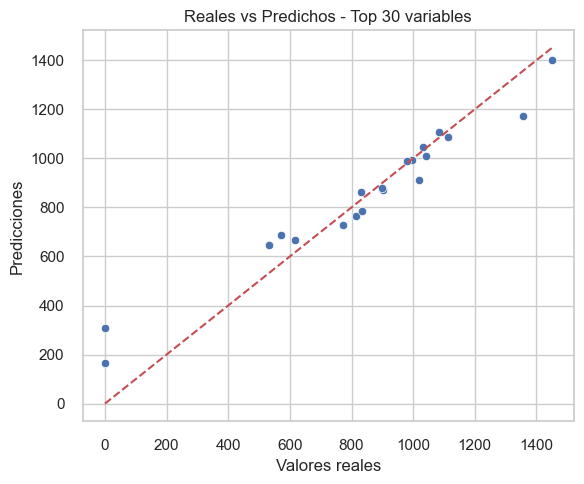

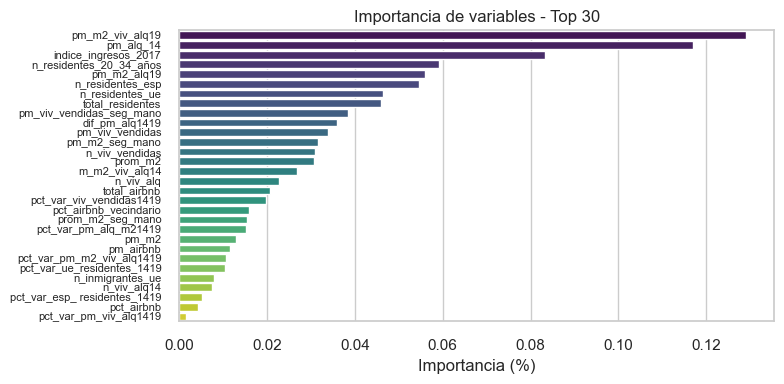

In [83]:
# Bucle para evaluar distintos top-N variables
print("Resultados para distintos N features:\n")

for N in [5, 10, 15, 20, 30]:
    indices = indices_total[:N]
    selected_features = [feature_names[i] for i in indices]

    X_train_sel = X_train[:, indices]
    X_test_sel = X_test[:, indices]

    # Entrenar modelo con top N variables
    rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_temp.fit(X_train_sel, y_train)

    # Obtener importancia en este submodelo
    importances_sub = rf_temp.feature_importances_

    # Emparejar nombres e importancias
    feature_importance_pairs = sorted(
        zip(selected_features, importances_sub),
        key=lambda x: x[1],
        reverse=True
    )

    # Evaluación
    y_pred = rf_temp.predict(X_test_sel)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Top {N} variables:")
    print(f"R²: {r2:.3f} | RMSE: {rmse:.2f}")
    print(" Importancia de variables en este modelo:")
    for feat, imp in feature_importance_pairs:
        print(f"- {feat}: {imp:.3%}")  # ← CORREGIDA esta indentación
    print("-" * 60)

    # Gráfico de dispersión reales vs predichos
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title(f"Reales vs Predichos - Top {N} variables")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"grafico_top_{N}_features.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Gráfico de barras con importancia de variables
    feat_names_plot = [f[0] for f in feature_importance_pairs]
    importances_plot = [f[1] for f in feature_importance_pairs]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=importances_plot, y=feat_names_plot, palette="viridis")
    plt.xlabel("Importancia (%)")
    plt.yticks(fontsize=8)
    plt.title(f"Importancia de variables - Top {N}")
    plt.tight_layout()
    plt.savefig(f"importancia_top_{N}_features.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

 

# 3.2 Modelo Random Forest solo con variables de airbnb

In [84]:
# Filtrar columnas Datos AirBnb
columnas_deseadas = ['nom_distrito', 
                     'pm_alq19', 
                     'total_residentes',
                     'total_airbnb', 
                     'n_hab_ent', 
                     'pct_hab_ent', 
                      'pm_hab_ent', 
                     'pct_var_airbnb1519',
                     'pct_var_hab_ent_1519',  
                     'pct_var_pm_airbnb_1519',
                     'pct_var_pm_airbnb_ent_1519',
                     'pct_var_pm_hab_ent_1519',
                      'pct_airbnb',
                      'pct_airbnb_vecindario',
                     'dif_pm_airbnb_1519',
                     'dif_pm_hab_ent_1519' ]

df = df_filtrado[columnas_deseadas].copy()

df['densidad_airbnb'] = df['total_airbnb'] / df['total_residentes']

df['nivel_airbnb'] = pd.cut(
    df['densidad_airbnb'], 
    bins=[
        df['densidad_airbnb'].quantile(0),
        df['densidad_airbnb'].quantile(0.35),
        df['densidad_airbnb'].quantile(0.80),
        df['densidad_airbnb'].quantile(1.0)
    ], 
    labels=['Bajo', 'Medio', 'Alto']
)


In [85]:
# Asegurar que 'codigo' sea una columna
if 'codigo' not in df.columns:
    df = df.reset_index()

# # Función para crear conjuntos de entrenamiento y prueba personalizados con la lógica anterior
def split_custom_test_set(df_: pd.DataFrame, test_size=2) -> tuple[pd.DataFrame, pd.DataFrame]:
    test_set = (
        df_
        .groupby('nom_distrito')
        .apply(lambda x: x.drop(columns='nom_distrito').sample(n=test_size, random_state=42))
        .reset_index(drop=True)
        .set_index('codigo')
    )

    # Remove the test set from the original DataFrame
    train_set = df_.set_index('codigo').drop(test_set.index)

    return train_set, test_set


In [86]:
# Aplicar la función para obtener train y test sets
train_set, test_set = split_custom_test_set(df)
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

In [87]:
# Limpiar índices para trabajar cómodamente
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

## Preprocesamiento de datos

In [88]:
# Preparar las variables para el modelo (feature engineering)
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# # Identificar columnas numéricas y categóricas que usaremos como features
target = 'pm_alq19'
features= ['total_residentes','total_airbnb','n_hab_ent','pct_hab_ent','pm_airbnb','pm_hab_ent', 
                     'pct_var_airbnb1519','pct_var_hab_ent_1519','pct_var_pm_airbnb_1519', 'pct_var_pm_airbnb_ent_1519',
                     'pct_var_pm_hab_ent_1519', 'pct_airbnb','dif_pm_airbnb_1519','dif_pm_hab_ent_1519' ]
exclude = ['codigo', 'nom_distrito', 'nom_barri', target]  


def get_feature_columns(df, exclude):
    num_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.difference(exclude)
    return list(num_cols), list(cat_cols)

num_cols, cat_cols = get_feature_columns(train_set, exclude)

# Imputar valores faltantes (numéricos con mediana, categóricos con la moda)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_num = num_imputer.fit_transform(train_set[num_cols])
X_test_num = num_imputer.transform(test_set[num_cols])

X_train_cat = cat_imputer.fit_transform(train_set[cat_cols])
X_test_cat = cat_imputer.transform(test_set[cat_cols])

#  Codificar variables categóricas con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

# Combinar variables numéricas y codificadas en matrices finales para el modelo
import numpy as np
X_train = np.hstack([X_train_num, X_train_cat_enc])
X_test = np.hstack([X_test_num, X_test_cat_enc])
y_train = train_set[target].values
y_test = test_set[target].values

# Obtener nombres de las variables después de codificar
feature_names = num_cols + list(encoder.get_feature_names_out(cat_cols))


## Entrenamiento de Modelo

In [89]:
## Selección de variables importantes usando Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# Select top N features
#N = 10  # Número de variables top a seleccionar
N = 20 # Top 20 Features
indices = np.argsort(importances)[::-1][:N]
selected_features = [feature_names[i] for i in indices]

# Reducir matrices a solo las variables seleccionadas
X_train_sel = X_train[:, indices]
X_test_sel = X_test[:, indices]

In [90]:
# Entrenar el modelo final con las variables seleccionadas
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X_train_sel, y_train)

RandomForestRegressor(random_state=42)

In [91]:
# Evaluar el modelo con métricas de rendimiento
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = rf_final.predict(X_test_sel)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nRandom Forest Evaluation on Test Set:")
print(f"R^2: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


Random Forest Evaluation on Test Set:
R^2: 0.746
RMSE: 180.43


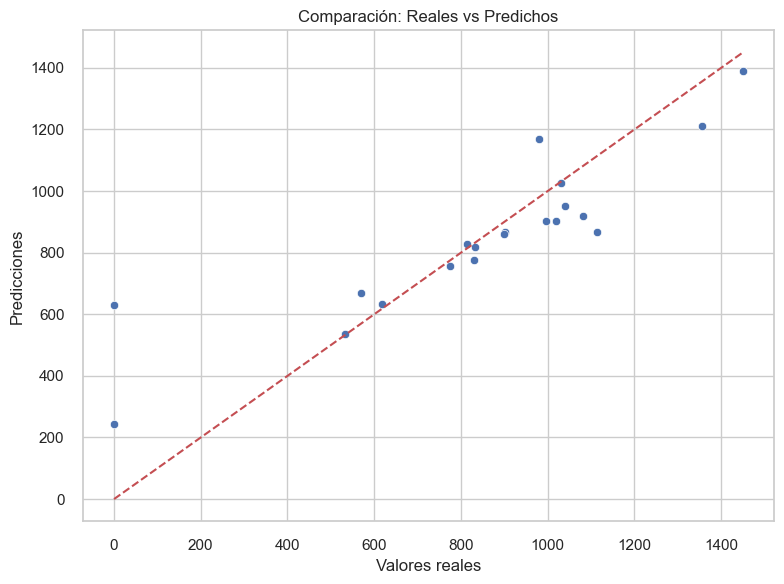

In [92]:
# Gráfico de dispersión real vs predicho
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # línea de referencia diagonal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación: Reales vs Predichos")
plt.grid(True)
plt.tight_layout()
plt.savefig("grafico_reales_vs_predichos.png", dpi=300, bbox_inches='tight')
plt.savefig("rf_airbnb", dpi=300)  
plt.show()

In [93]:
def plot_feature_importances(model, feature_names, top_n=20, figsize=(10, 6), title="Feature Importances"):
    if not hasattr(model, "feature_importances_"):
        raise ValueError("The model does not have a `feature_importances_` attribute.")
    
    # Create a Series with feature importances
    importances = pd.Series(model.feature_importances_, index=feature_names)
    importances = importances.sort_values(ascending=False).head(top_n)

    # Plotting
    plt.figure(figsize=figsize)
    importances.plot(kind="barh", color="skyblue")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

In [94]:
rf_final.feature_importances_

array([0.25342769, 0.20732126, 0.11426154, 0.05021798, 0.07890369,
       0.05634337, 0.04891981, 0.03967049, 0.03606082, 0.0187622 ,
       0.02788655, 0.01330169, 0.02142526, 0.02013836, 0.01027713,
       0.00176034, 0.00092337, 0.00039844])

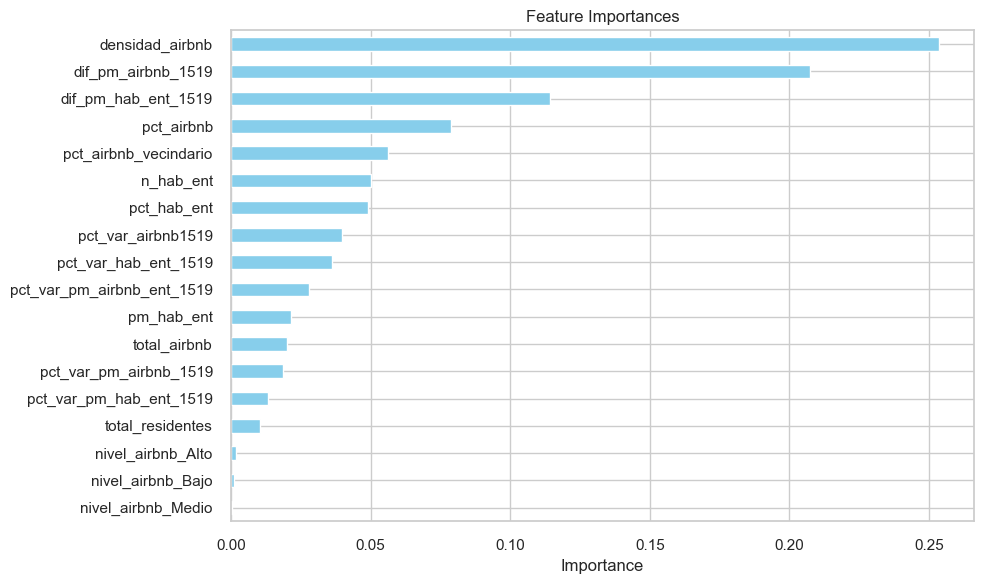

<Figure size 800x550 with 0 Axes>

In [95]:
# Plot feature importances
plot_feature_importances(rf_final, feature_names)
plt.savefig('grafico.png')
plt.show()

In [96]:
print("Top features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.3f}")

Top features:
total_residentes: 0.229
pm_hab_ent: 0.196
pct_hab_ent: 0.111
pct_airbnb: 0.070
n_hab_ent: 0.067
pct_airbnb_vecindario: 0.064
total_airbnb: 0.062
densidad_airbnb: 0.043
pct_var_pm_airbnb_ent_1519: 0.032
dif_pm_airbnb_1519: 0.028
pct_var_hab_ent_1519: 0.023
dif_pm_hab_ent_1519: 0.021
pct_var_airbnb1519: 0.019
pct_var_pm_airbnb_1519: 0.017
pct_var_pm_hab_ent_1519: 0.015
nivel_airbnb_Bajo: 0.002
nivel_airbnb_Medio: 0.001
nivel_airbnb_Alto: 0.000
